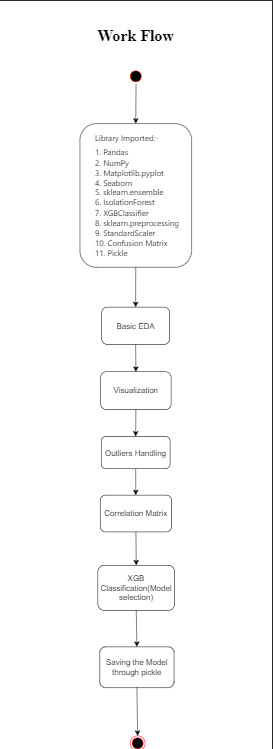

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Basic Exploratory Data Analysis and inferences [02]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/content/drive/MyDrive/daa_ml/Copy of Copy of train.csv")

In [4]:
test = pd.read_csv("/content/drive/MyDrive/daa_ml/Copy of test.csv")

In [5]:
train.shape

(4000000, 51)

In [6]:
test.shape

(2000000, 51)

In [7]:
train.columns

Index(['objID', 'run', 'camcol', 'field', 'type', 'rowv', 'colv', 'u', 'g',
       'r', 'i', 'z', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i',
       'petroRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i',
       'expRad_z', 'q_u', 'q_g', 'q_r', 'q_i', 'q_z', 'u_u', 'u_g', 'u_r',
       'u_i', 'u_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'ra', 'dec', 'b', 'l'],
      dtype='object')

In [8]:
test.columns

Index(['objID', 'run', 'camcol', 'field', 'type', 'rowv', 'colv', 'u', 'g',
       'r', 'i', 'z', 'psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i',
       'psfMag_z', 'modelFlux_u', 'modelFlux_g', 'modelFlux_r', 'modelFlux_i',
       'modelFlux_z', 'petroRad_u', 'petroRad_g', 'petroRad_r', 'petroRad_i',
       'petroRad_z', 'expRad_u', 'expRad_g', 'expRad_r', 'expRad_i',
       'expRad_z', 'q_u', 'q_g', 'q_r', 'q_i', 'q_z', 'u_u', 'u_g', 'u_r',
       'u_i', 'u_z', 'expAB_u', 'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z',
       'ra', 'dec', 'b', 'l'],
      dtype='object')

In [9]:
train.head()

,objID,run,camcol,field,type,rowv,colv,u,g,r,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
0,1237646791699727334,307,1,170,star,0.003050,-0.022903,24.61602,22.27828,21.09076,...,-0.014500,0.999895,0.199379,0.299879,0.148796,0.132848,101.439548,-0.770031,-1.614761,212.969936
1,1237646797595610001,308,4,22,galaxy,0.010320,0.002395,25.77781,24.34480,22.17616,...,0.129077,0.050000,0.050000,0.050000,0.393401,0.455359,109.605634,0.531213,6.244492,215.544509
2,1237648705132823367,752,5,554,galaxy,-0.004909,-0.008557,23.31927,22.80799,21.51392,...,0.562881,0.050000,0.050000,0.093242,0.278645,0.050000,226.482378,0.601693,48.231387,359.155718
3,1237646382079477246,211,6,357,star,0.001676,-0.002634,20.31570,18.04348,16.93458,...,0.014352,0.960985,0.212596,0.649828,0.249662,0.951631,94.423463,0.902236,-7.086549,208.255813
4,1237646588250424751,259,6,548,star,-0.032870,0.017114,23.97331,23.76811,22.12636,...,0.046240,0.094446,0.050000,0.159893,0.081894,0.050000,88.687781,1.181934,-12.031041,205.295269


In [10]:
test.head()

,objID,run,camcol,field,type,rowv,colv,u,g,r,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
0,1237648720159047959,756,1,460,galaxy,-0.004107,-0.001221,21.39314,19.67209,18.76635,...,-0.182132,0.449449,0.361017,0.405215,0.354115,0.368526,184.701503,-1.007599,60.788789,286.030708
1,1237648720689890022,756,2,368,galaxy,0.025153,0.011290,22.98740,21.79531,21.21400,...,0.573862,0.050000,0.431045,0.311062,0.452516,0.350301,170.989219,-0.620917,55.179496,262.214542
2,1237648721788666621,756,4,750,galaxy,-0.026873,0.000046,23.63963,22.67458,21.12073,...,0.275164,0.050000,0.050000,0.738871,0.665720,0.185434,228.058695,0.323022,46.870958,0.405620
3,1237648721783620467,756,4,673,galaxy,-0.010594,0.005233,22.61031,22.06982,21.12407,...,-0.551935,0.050000,0.080273,0.399240,0.571731,0.050000,216.612161,0.387707,54.851870,347.330290
4,1237646797596328119,308,4,33,star,0.014279,-0.010539,25.07019,23.58140,22.55350,...,-1.365853,0.050000,0.072046,0.077018,0.116089,0.167064,111.202162,0.538610,7.666844,216.274921


In [11]:
train.tail()

,objID,run,camcol,field,type,rowv,colv,u,g,r,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
3999995,1237646794379363191,307,6,98,star,0.000134,0.001939,20.41280,18.88110,17.96637,...,-0.015153,0.394177,0.749942,0.084883,0.999686,0.050000,90.662393,1.324754,-10.220637,206.110668
3999996,1237649920044564985,1035,4,140,galaxy,0.007987,-0.024782,23.64491,22.52924,22.21673,...,-1.169113,0.050000,0.050000,0.506694,0.078790,0.060764,27.024071,14.106716,-46.532898,143.112824
3999997,1237646797596396830,308,4,34,galaxy,0.038774,-0.061793,24.74679,25.38258,22.61522,...,2.710123,0.096447,0.996055,0.196658,0.192084,0.050000,111.461100,0.440096,7.851655,216.483210
3999998,1237646797062210840,308,3,75,galaxy,0.000221,-0.000558,20.61652,18.46505,17.36838,...,-0.030545,0.660165,0.944426,0.830484,0.773838,0.811426,117.608337,0.134761,13.158636,219.654765
3999999,1237646647835231356,273,5,428,galaxy,0.053923,-0.115644,23.36677,21.75899,20.68041,...,-0.705233,0.050000,0.122055,0.233715,0.192182,0.050000,74.024295,0.617223,-25.106124,198.251036


In [12]:
test.tail()

,objID,run,camcol,field,type,rowv,colv,u,g,r,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
1999995,1237648705118798324,752,5,340,galaxy,0.012792,0.036150,24.18070,23.15885,22.23841,...,0.293009,0.050000,0.223203,0.577226,0.051611,0.050000,194.416822,0.607546,63.437081,306.415936
1999996,1237648673992476077,745,3,526,galaxy,-0.130801,0.031948,25.93180,25.21857,22.16751,...,-0.136833,0.999507,0.105894,0.079670,0.050000,0.050000,237.565929,-0.023240,39.223596,8.172956
1999997,1237648721246814572,756,3,674,galaxy,0.004873,0.005364,20.51312,19.28110,18.85526,...,-0.025527,0.061188,0.274516,0.272457,0.296659,0.335664,216.802280,-0.154969,54.308420,347.006081
1999998,1237646587710604675,259,5,503,star,-0.001871,-0.002705,23.56459,22.12473,21.23118,...,-0.227876,0.336862,0.192242,0.999657,0.504387,0.352604,81.922041,0.840113,-18.138500,202.260382
1999999,1237646796525471075,308,2,77,star,0.014133,0.019328,24.88434,23.07476,21.57137,...,0.090853,0.193662,0.069149,0.370523,0.149021,0.086989,117.782478,-0.396812,13.063301,220.220704


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   run          int64  
 2   camcol       int64  
 3   field        int64  
 4   type         object 
 5   rowv         float64
 6   colv         float64
 7   u            float64
 8   g            float64
 9   r            float64
 10  i            float64
 11  z            float64
 12  psfMag_u     float64
 13  psfMag_g     float64
 14  psfMag_r     float64
 15  psfMag_i     float64
 16  psfMag_z     float64
 17  modelFlux_u  float64
 18  modelFlux_g  float64
 19  modelFlux_r  float64
 20  modelFlux_i  float64
 21  modelFlux_z  float64
 22  petroRad_u   float64
 23  petroRad_g   float64
 24  petroRad_r   float64
 25  petroRad_i   float64
 26  petroRad_z   float64
 27  expRad_u     float64
 28  expRad_g     float64
 29  expRad_r     float64
 30  expRad_i     float64
 31  expRad_z     float64
 32

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   run          int64  
 2   camcol       int64  
 3   field        int64  
 4   type         object 
 5   rowv         float64
 6   colv         float64
 7   u            float64
 8   g            float64
 9   r            float64
 10  i            float64
 11  z            float64
 12  psfMag_u     float64
 13  psfMag_g     float64
 14  psfMag_r     float64
 15  psfMag_i     float64
 16  psfMag_z     float64
 17  modelFlux_u  float64
 18  modelFlux_g  float64
 19  modelFlux_r  float64
 20  modelFlux_i  float64
 21  modelFlux_z  float64
 22  petroRad_u   float64
 23  petroRad_g   float64
 24  petroRad_r   float64
 25  petroRad_i   float64
 26  petroRad_z   float64
 27  expRad_u     float64
 28  expRad_g     float64
 29  expRad_r     float64
 30  expRad_i     float64
 31  expRad_z     float64
 32

In [15]:
train.describe()

,objID,run,camcol,field,rowv,colv,u,g,r,i,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
count,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,...,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06,4.000000e+06
mean,1.237648e+18,5.659329e+02,3.491990e+00,3.539839e+02,-1.229906e+00,-1.229669e+00,2.326655e+01,2.196408e+01,2.075499e+01,2.026221e+01,...,1.581106e-02,2.020452e-01,3.187758e-01,3.895273e-01,4.070051e-01,2.846370e-01,1.465570e+02,1.294996e+00,1.666282e+01,2.041597e+02
std,1.157163e+12,2.694373e+02,1.640876e+00,2.108861e+02,1.108875e+02,1.108875e+02,1.806353e+00,1.951670e+00,1.704858e+00,1.741248e+00,...,1.878144e+02,2.541024e-01,2.890191e-01,2.956003e-01,3.006857e-01,2.814496e-01,6.975852e+01,7.117185e+00,3.360723e+01,9.805877e+01
min,1.237646e+18,9.400000e+01,1.000000e+00,1.100000e+01,-9.999000e+03,-9.999000e+03,1.036910e+01,9.859290e+00,9.135631e+00,8.364407e+00,...,-2.253042e+05,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.052647e+00,-9.043676e+00,-6.459335e+01,1.656026e-04
25%,1.237647e+18,3.070000e+02,2.000000e+00,1.650000e+02,-4.691689e-03,-4.336495e-03,2.246006e+01,2.106500e+01,1.996472e+01,1.939146e+01,...,-8.673370e-02,5.000000e-02,5.766463e-02,1.089202e-01,1.265294e-01,5.000000e-02,9.472061e+01,-5.084042e-01,-7.375052e+00,1.957083e+02
50%,1.237649e+18,7.520000e+02,4.000000e+00,3.790000e+02,0.000000e+00,0.000000e+00,2.355378e+01,2.240022e+01,2.125834e+01,2.062551e+01,...,2.196148e-03,7.666935e-02,2.071002e-01,3.302743e-01,3.500178e-01,1.552323e-01,1.213573e+02,1.047863e-01,1.492706e+01,2.117058e+02
75%,1.237649e+18,7.560000e+02,5.000000e+00,5.240000e+02,4.974178e-03,4.561059e-03,2.450333e+01,2.325198e+01,2.199472e+01,2.142812e+01,...,9.348729e-02,2.360698e-01,5.170471e-01,6.174082e-01,6.417696e-01,4.268602e-01,2.110722e+02,7.513936e-01,4.847013e+01,2.560645e+02
max,1.237650e+18,1.045000e+03,6.000000e+00,8.120000e+02,5.053162e+00,5.513298e+00,3.360400e+01,3.745042e+01,3.154985e+01,3.482836e+01,...,1.422288e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.596718e+02,7.511553e+01,6.413183e+01,3.600000e+02


In [16]:
test.describe()

,objID,run,camcol,field,rowv,colv,u,g,r,i,...,u_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,ra,dec,b,l
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,...,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,1.237648e+18,5.658843e+02,3.492101e+00,3.538381e+02,-1.354921e+00,-1.354632e+00,2.326625e+01,2.196315e+01,2.075432e+01,2.026155e+01,...,-2.448886e-01,2.019627e-01,3.191859e-01,3.900195e-01,4.069780e-01,2.843156e-01,1.464767e+02,1.287038e+00,1.666308e+01,2.044069e+02
std,1.157124e+12,2.694284e+02,1.640540e+00,2.108585e+02,1.163850e+02,1.163850e+02,1.806957e+00,1.951588e+00,1.704328e+00,1.740415e+00,...,3.472995e+02,2.540642e-01,2.893156e-01,2.955593e-01,3.006019e-01,2.813624e-01,6.970023e+01,7.074938e+00,3.361850e+01,9.797940e+01
min,1.237646e+18,9.400000e+01,1.000000e+00,1.100000e+01,-9.999000e+03,-9.999000e+03,1.092355e+01,1.018683e+01,1.101694e+01,8.616890e+00,...,-4.292553e+05,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.000000e-02,5.064913e+00,-9.040247e+00,-6.459584e+01,1.109965e-04
25%,1.237647e+18,3.070000e+02,2.000000e+00,1.650000e+02,-4.683877e-03,-4.334275e-03,2.245829e+01,2.106288e+01,1.996169e+01,1.939010e+01,...,-8.624678e-02,5.000000e-02,5.764882e-02,1.097313e-01,1.267204e-01,5.000000e-02,9.472403e+01,-5.076279e-01,-7.363149e+00,1.958025e+02
50%,1.237649e+18,7.520000e+02,4.000000e+00,3.790000e+02,0.000000e+00,0.000000e+00,2.355434e+01,2.239848e+01,2.125652e+01,2.062465e+01,...,2.213332e-03,7.659205e-02,2.079426e-01,3.313118e-01,3.500277e-01,1.547220e-01,1.213363e+02,1.046512e-01,1.493748e+01,2.117309e+02
75%,1.237649e+18,7.560000e+02,5.000000e+00,5.230000e+02,4.967331e-03,4.567478e-03,2.450361e+01,2.324988e+01,2.199418e+01,2.142854e+01,...,9.383790e-02,2.356087e-01,5.180670e-01,6.178663e-01,6.414919e-01,4.260243e-01,2.109600e+02,7.521830e-01,4.851790e+01,2.563570e+02
max,1.237650e+18,1.045000e+03,6.000000e+00,8.120000e+02,1.141560e+01,4.449560e+00,3.370969e+01,3.784982e+01,2.949748e+01,3.401031e+01,...,1.587428e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.596666e+02,7.501625e+01,6.413055e+01,3.600000e+02


In [17]:
train.dtypes

objID            int64
run              int64
camcol           int64
field            int64
type            object
rowv           float64
colv           float64
u              float64
g              float64
r              float64
i              float64
z              float64
psfMag_u       float64
psfMag_g       float64
psfMag_r       float64
psfMag_i       float64
psfMag_z       float64
modelFlux_u    float64
modelFlux_g    float64
modelFlux_r    float64
modelFlux_i    float64
modelFlux_z    float64
petroRad_u     float64
petroRad_g     float64
petroRad_r     float64
petroRad_i     float64
petroRad_z     float64
expRad_u       float64
expRad_g       float64
expRad_r       float64
expRad_i       float64
expRad_z       float64
q_u            float64
q_g            float64
q_r            float64
q_i            float64
q_z            float64
u_u            float64
u_g            float64
u_r            float64
u_i            float64
u_z            float64
expAB_u        float64
expAB_g    

In [18]:
test.dtypes

objID            int64
run              int64
camcol           int64
field            int64
type            object
rowv           float64
colv           float64
u              float64
g              float64
r              float64
i              float64
z              float64
psfMag_u       float64
psfMag_g       float64
psfMag_r       float64
psfMag_i       float64
psfMag_z       float64
modelFlux_u    float64
modelFlux_g    float64
modelFlux_r    float64
modelFlux_i    float64
modelFlux_z    float64
petroRad_u     float64
petroRad_g     float64
petroRad_r     float64
petroRad_i     float64
petroRad_z     float64
expRad_u       float64
expRad_g       float64
expRad_r       float64
expRad_i       float64
expRad_z       float64
q_u            float64
q_g            float64
q_r            float64
q_i            float64
q_z            float64
u_u            float64
u_g            float64
u_r            float64
u_i            float64
u_z            float64
expAB_u        float64
expAB_g    

In [19]:
import seaborn as sns

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   run          int64  
 2   camcol       int64  
 3   field        int64  
 4   type         object 
 5   rowv         float64
 6   colv         float64
 7   u            float64
 8   g            float64
 9   r            float64
 10  i            float64
 11  z            float64
 12  psfMag_u     float64
 13  psfMag_g     float64
 14  psfMag_r     float64
 15  psfMag_i     float64
 16  psfMag_z     float64
 17  modelFlux_u  float64
 18  modelFlux_g  float64
 19  modelFlux_r  float64
 20  modelFlux_i  float64
 21  modelFlux_z  float64
 22  petroRad_u   float64
 23  petroRad_g   float64
 24  petroRad_r   float64
 25  petroRad_i   float64
 26  petroRad_z   float64
 27  expRad_u     float64
 28  expRad_g     float64
 29  expRad_r     float64
 30  expRad_i     float64
 31  expRad_z     float64
 32

In [21]:
counts = np.unique(train['camcol'])
print(counts)

[1 2 3 4 5 6]


In [22]:
counts = np.unique(train['run'])
print(counts)

[  94  109  125  211  250  251  259  273  287  297  307  308  727  745
  752  756  994 1000 1010 1022 1024 1033 1035 1037 1040 1043 1045]


In [23]:
counts = np.unique(train['field'])
print(counts)

[ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136
 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190
 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208
 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226
 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244
 245 246 247 248 249 250 251 252 253 254 255 256 25

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000000 entries, 0 to 3999999
Data columns (total 51 columns):
 #   Column       Dtype  
---  ------       -----  
 0   objID        int64  
 1   run          int64  
 2   camcol       int64  
 3   field        int64  
 4   type         object 
 5   rowv         float64
 6   colv         float64
 7   u            float64
 8   g            float64
 9   r            float64
 10  i            float64
 11  z            float64
 12  psfMag_u     float64
 13  psfMag_g     float64
 14  psfMag_r     float64
 15  psfMag_i     float64
 16  psfMag_z     float64
 17  modelFlux_u  float64
 18  modelFlux_g  float64
 19  modelFlux_r  float64
 20  modelFlux_i  float64
 21  modelFlux_z  float64
 22  petroRad_u   float64
 23  petroRad_g   float64
 24  petroRad_r   float64
 25  petroRad_i   float64
 26  petroRad_z   float64
 27  expRad_u     float64
 28  expRad_g     float64
 29  expRad_r     float64
 30  expRad_i     float64
 31  expRad_z     float64
 32

In [25]:
counts = np.unique(train['l'])
print(counts)

[1.65602644e-04 3.09206657e-04 3.11973538e-04 ... 3.59999903e+02
 3.59999930e+02 3.59999978e+02]


In [26]:
counts = np.unique(train['b'])
print(counts)

[-64.59335185 -64.59091217 -64.58886719 ...  64.1314173   64.1314902
  64.13183113]


In [27]:
counts = np.unique(train['rowv'])
print(counts)

[-9.999000e+03 -4.388996e+00 -3.718075e+00 ...  3.809427e+00  4.140910e+00
  5.053162e+00]


In [28]:
counts = np.unique(train['colv'])
print(counts)

[-9.999000e+03 -4.999719e+00 -4.714493e+00 ...  3.896019e+00  3.969501e+00
  5.513298e+00]


In [29]:
counts = np.unique(train['ra'])
print(counts)

[  5.05264668   5.06301399   5.06760017 ... 359.66430011 359.66545854
 359.6717712 ]


In [30]:
counts = np.unique(train['dec'])
print(counts)

[-9.04367635 -9.03843437 -9.03676527 ... 74.99796557 75.01811119
 75.11552652]


Inference:-

1. Categorical Values - run, camcol, type
2. Continuous Values - Other than run, camcol, type and obj_id

# 2. Visualization using various plots and their inferences.[04]

In [31]:
# import matplotlib.pyplot as plt
# import seaborn as sns

In [32]:
# plt.pie(train.camcol.value_counts().values, labels = train.camcol.value_counts().index, shadow=True,autopct = "%1.2f%%")
# plt.legend()

In [33]:
# sns.countplot(x="run", data=train)
# plt.xticks(rotation=45)  # Adjust the rotation angle as needed
# plt.show()

In [34]:
# ax = sns.countplot(x="run", data=train)
# plt.xticks(rotation=45)  # Adjust the rotation angle as needed
# ax.set_ylim(0,1e3)
# plt.show()

In [35]:
# sns.countplot(x="field", data=train)
# plt.xticks([])  # Hide the tick labels on the x-axis
# plt.show()

(array([620173., 460837., 370401., 212939., 564401., 614656., 501833.,
        266964., 336850.,  50946.]),
 array([ 11. ,  91.1, 171.2, 251.3, 331.4, 411.5, 491.6, 571.7, 651.8,
        731.9, 812. ]),
 <BarContainer object of 10 artists>)

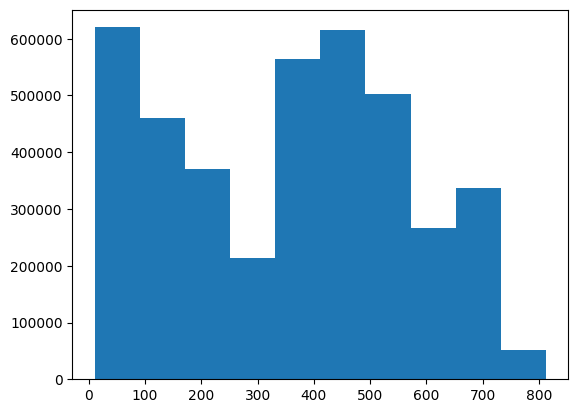

In [36]:
plt.hist(train['field'])

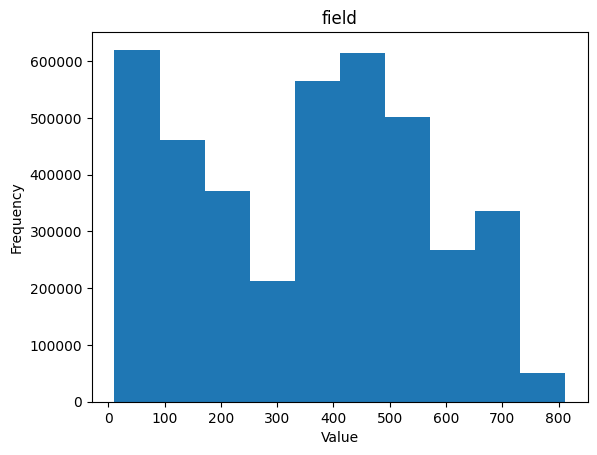

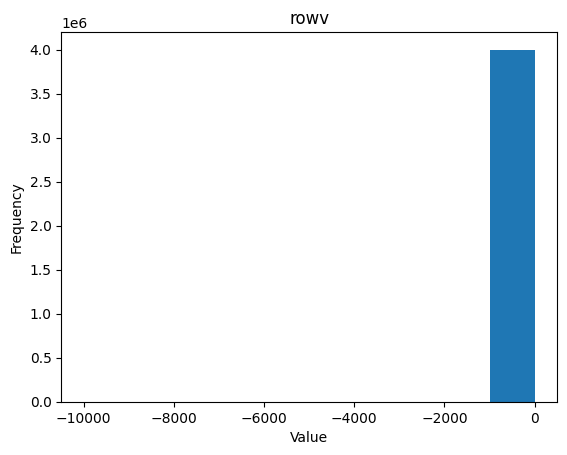

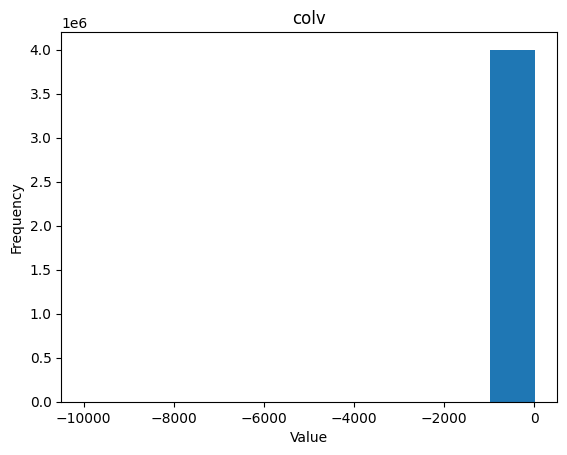

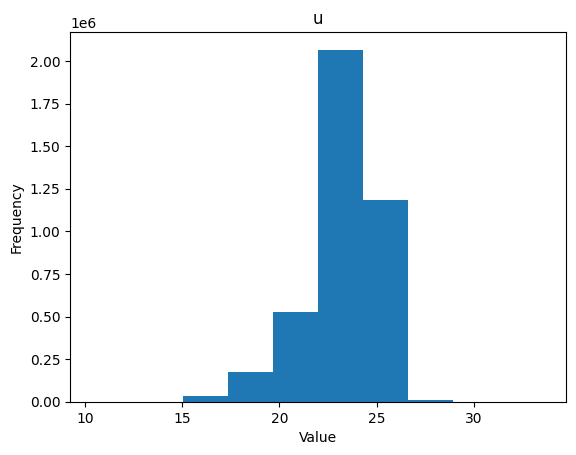

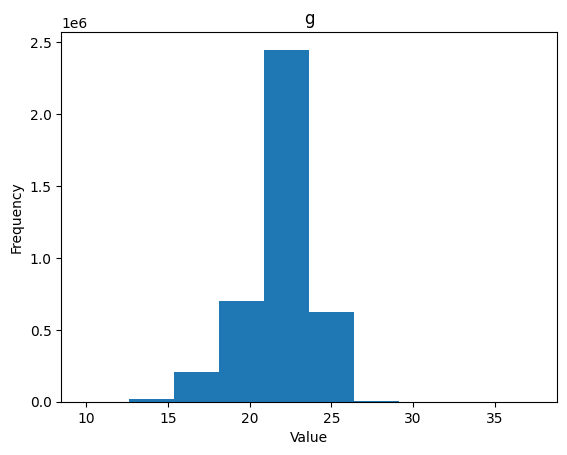

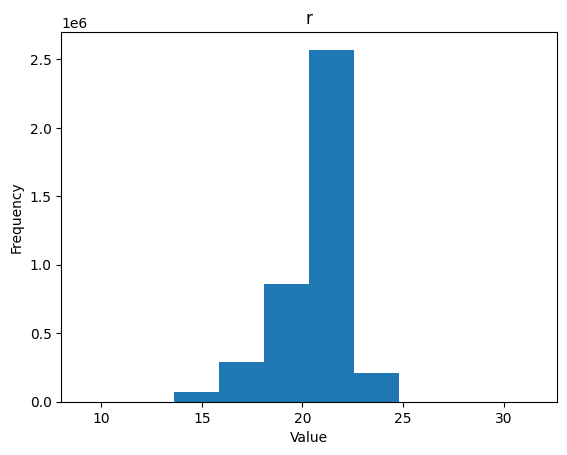

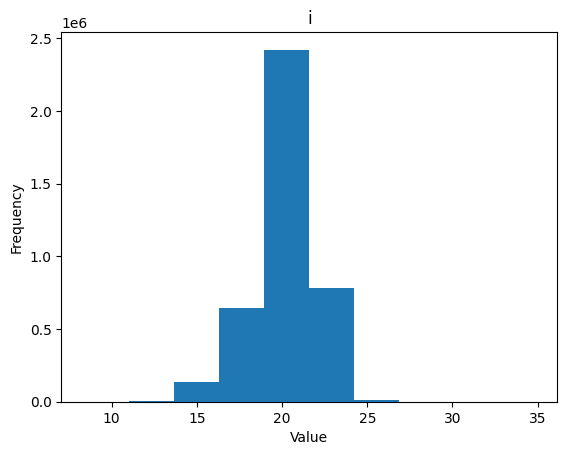

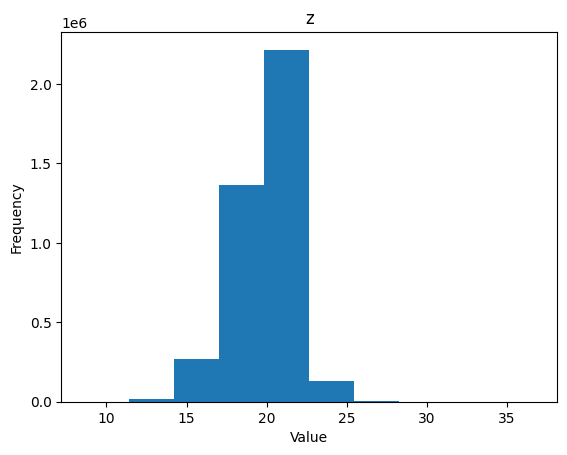

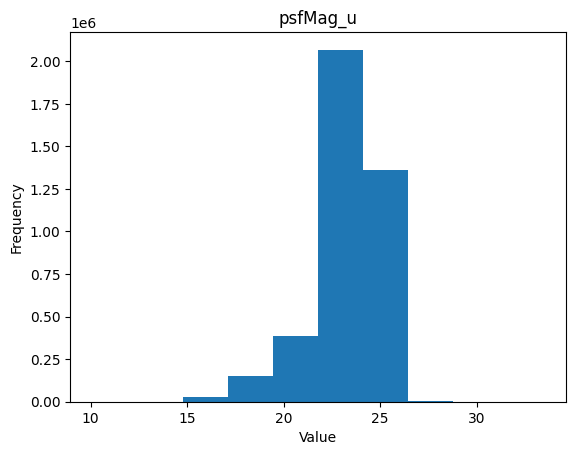

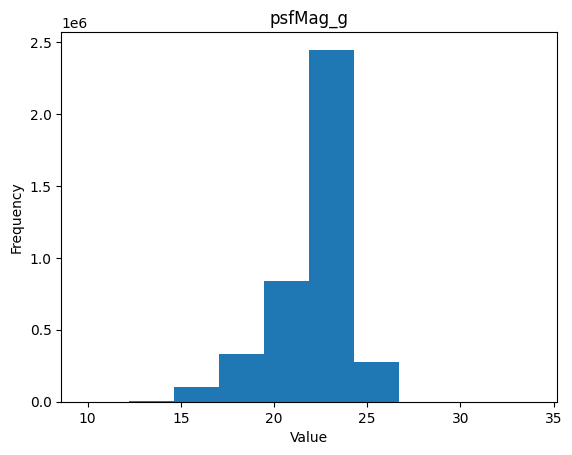

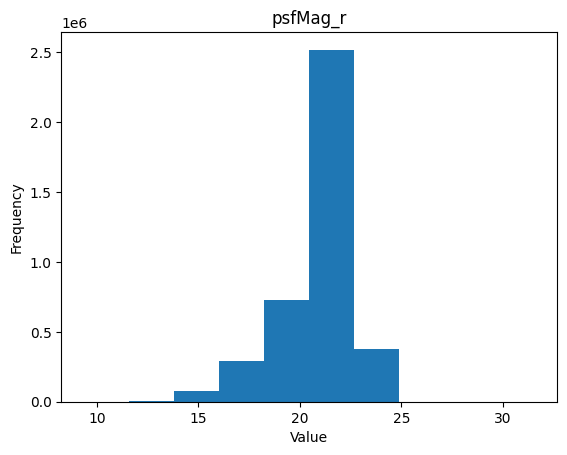

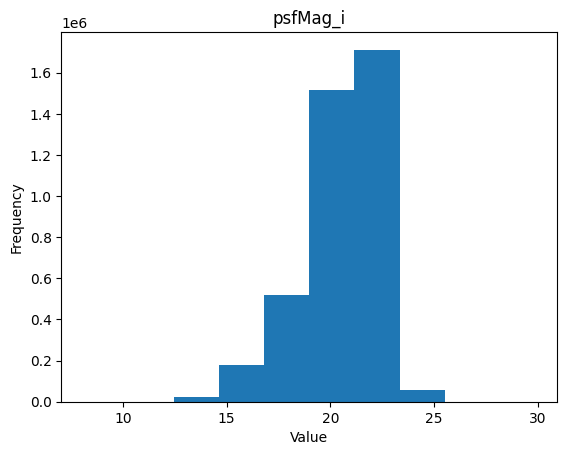

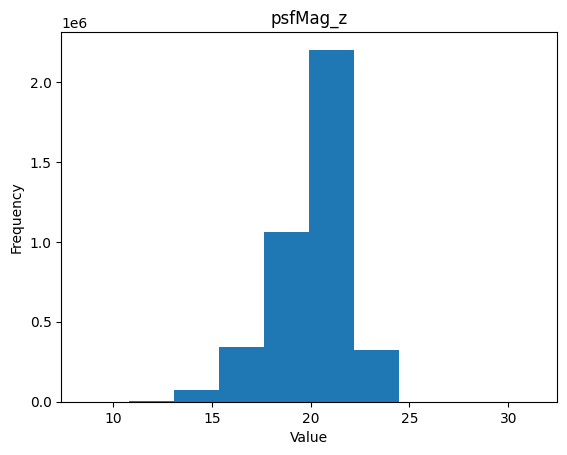

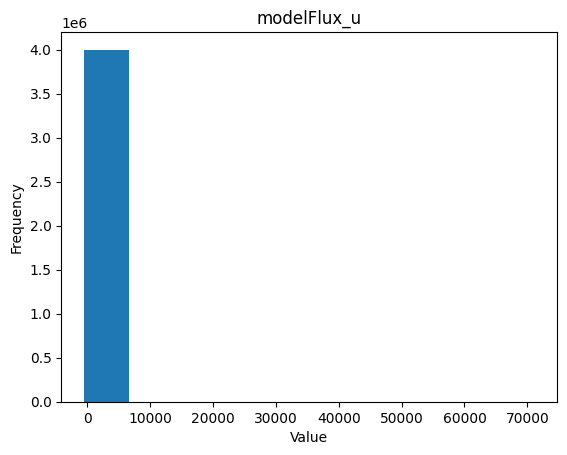

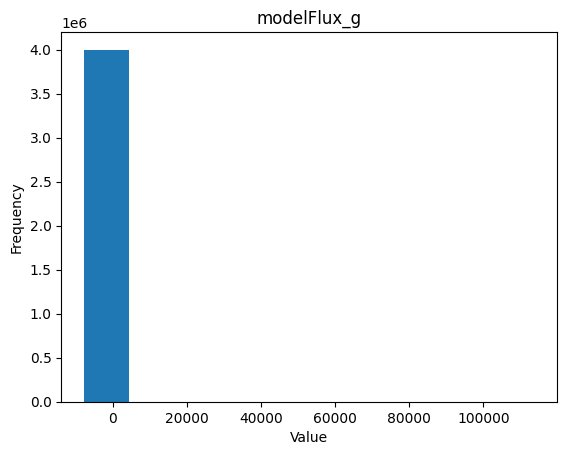

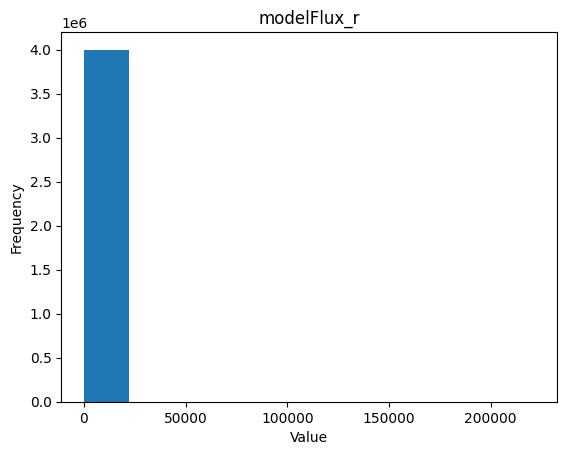

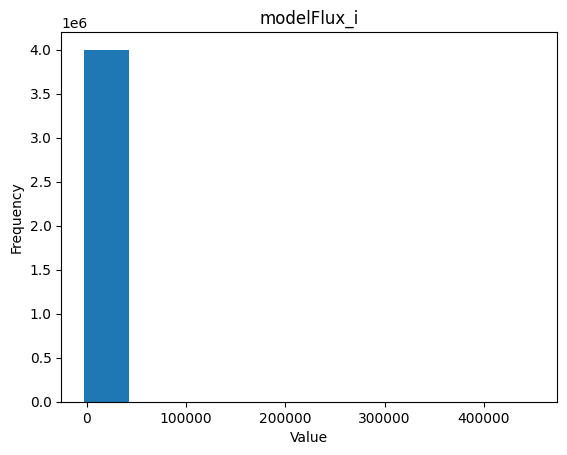

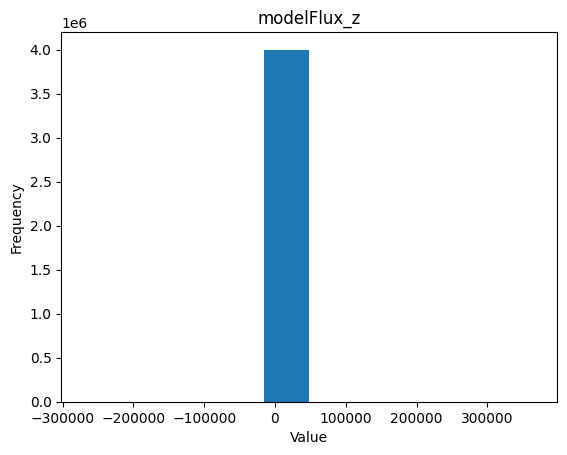

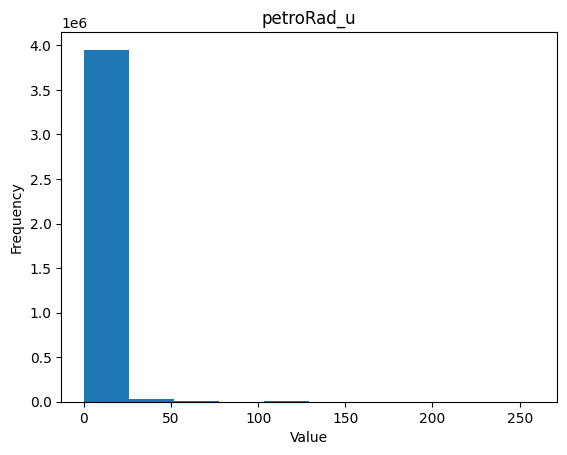

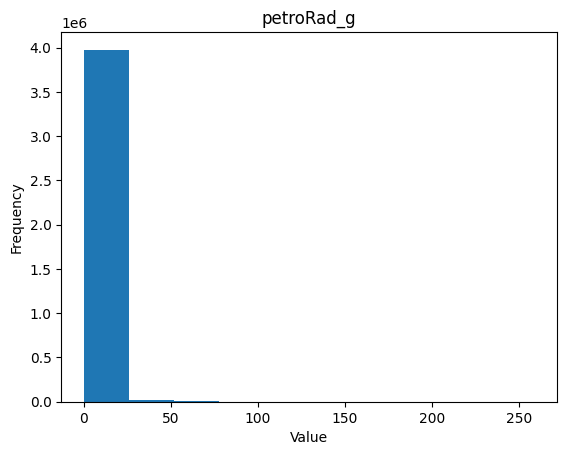

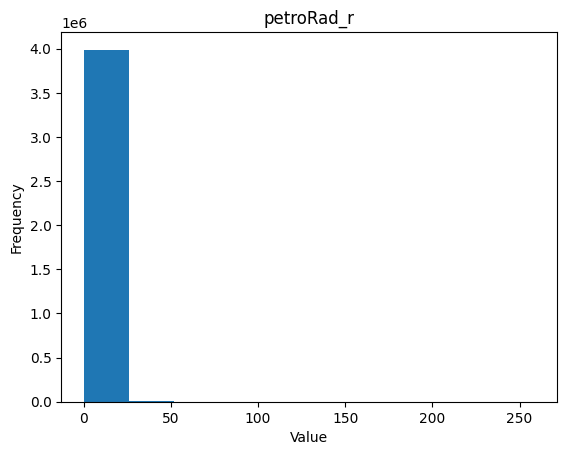

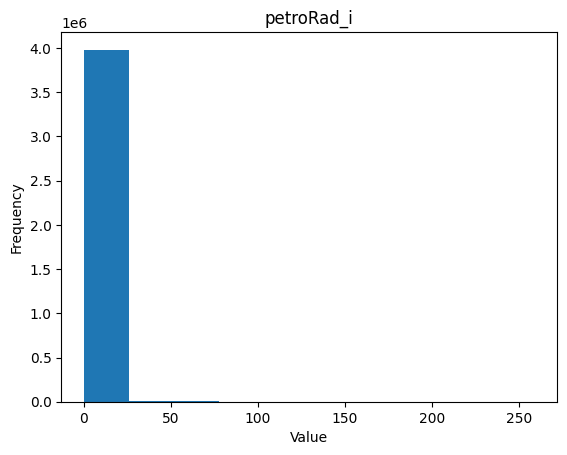

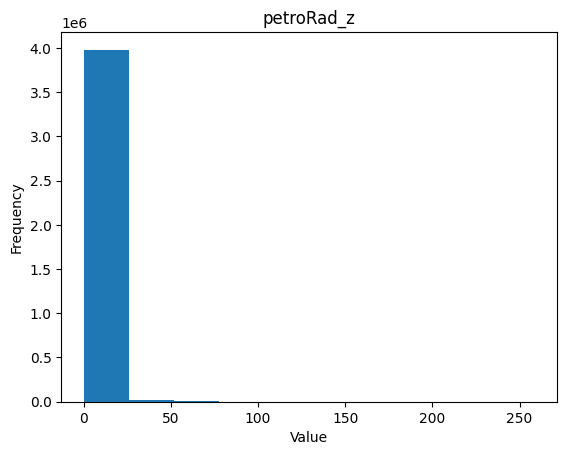

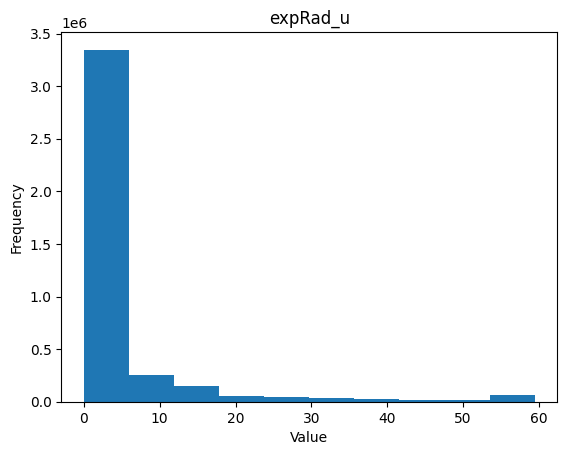

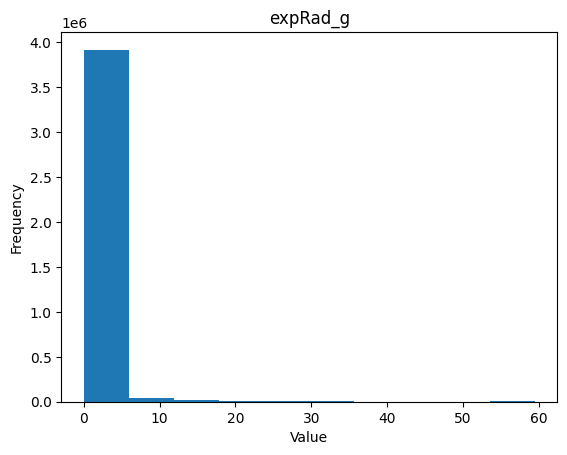

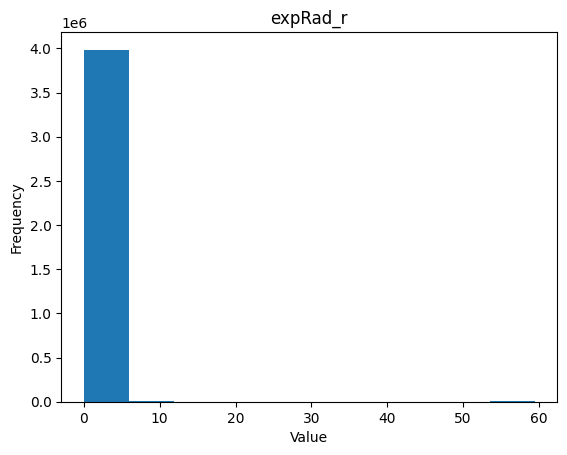

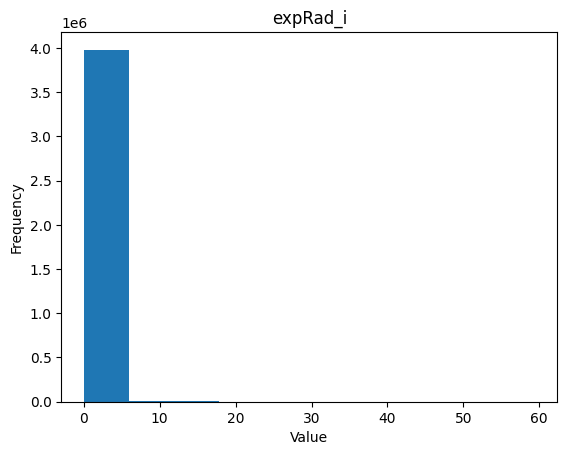

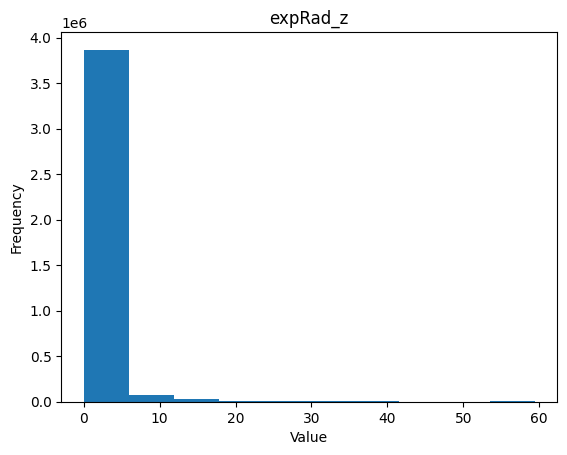

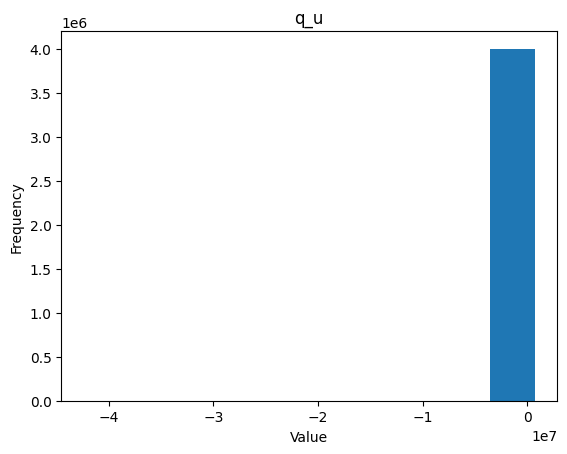

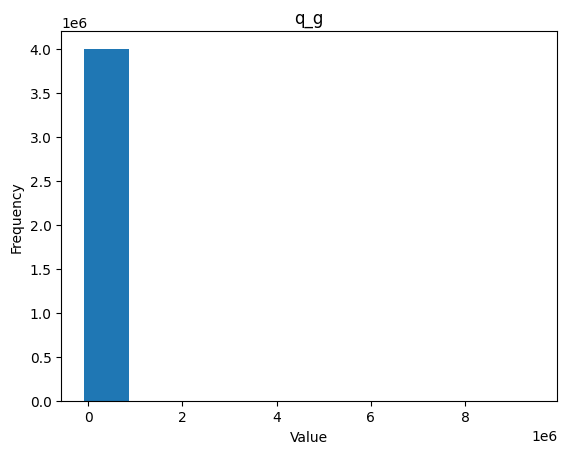

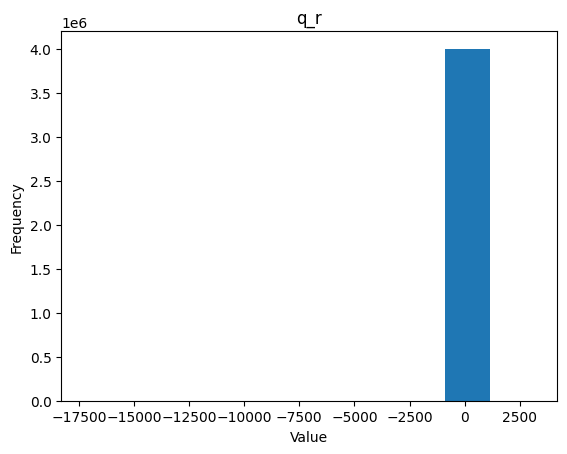

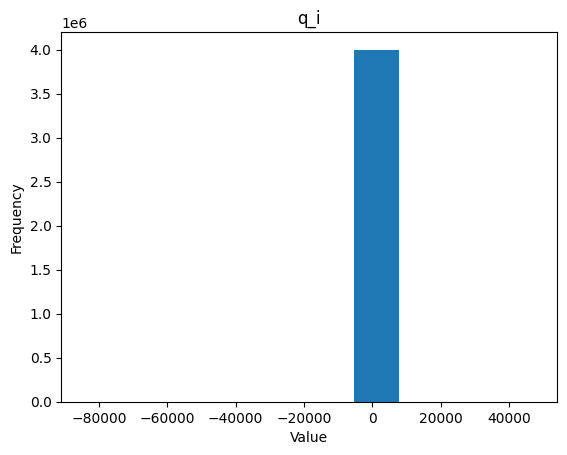

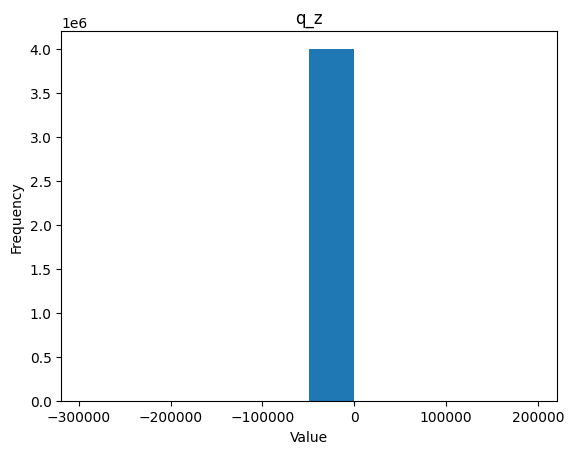

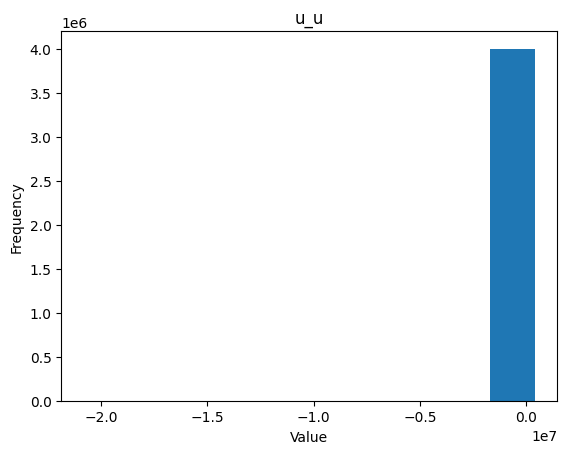

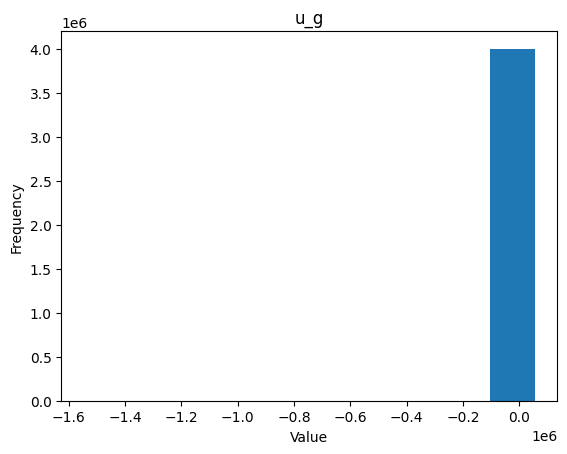

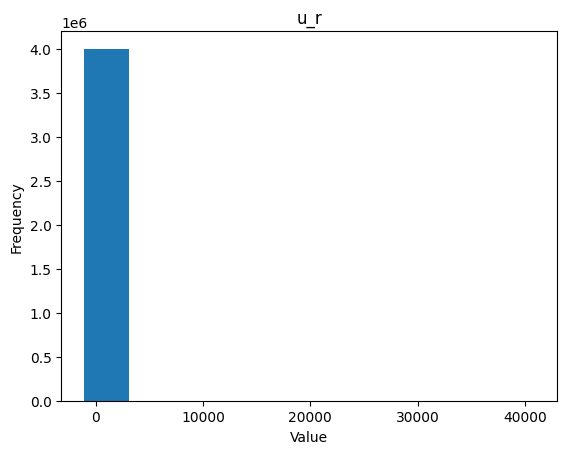

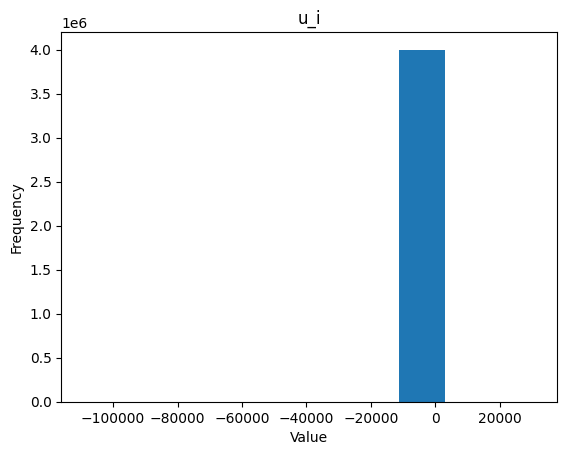

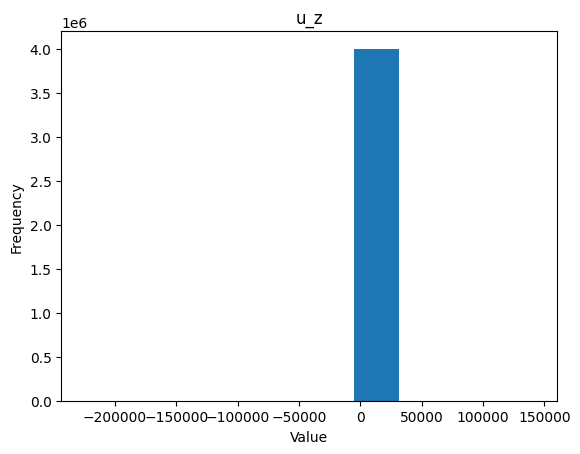

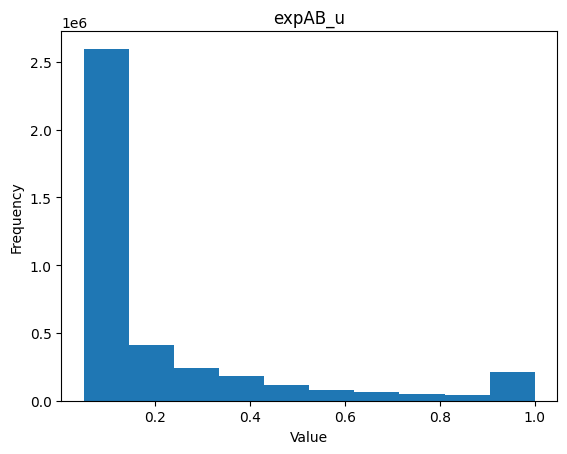

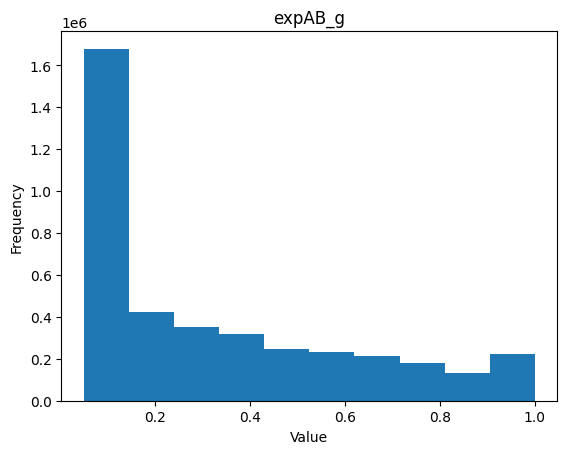

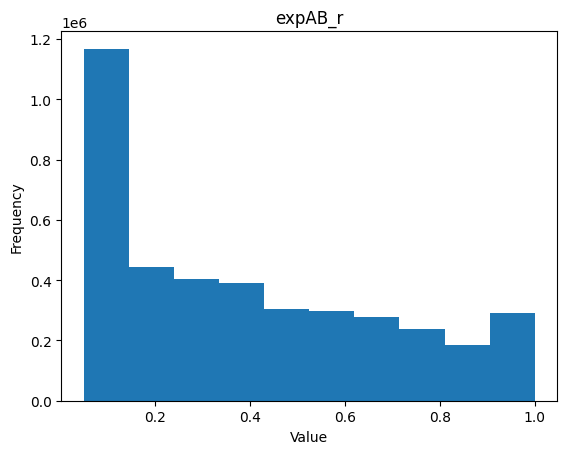

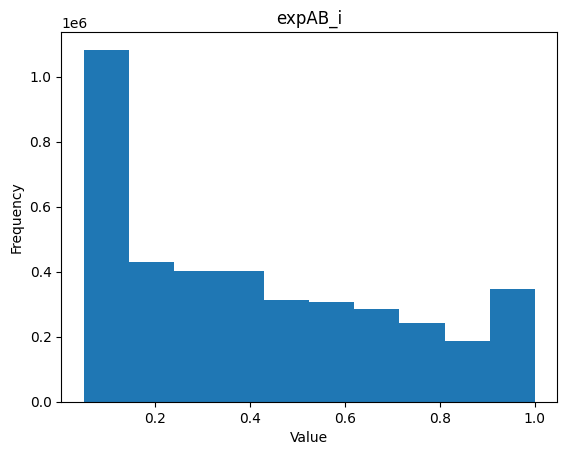

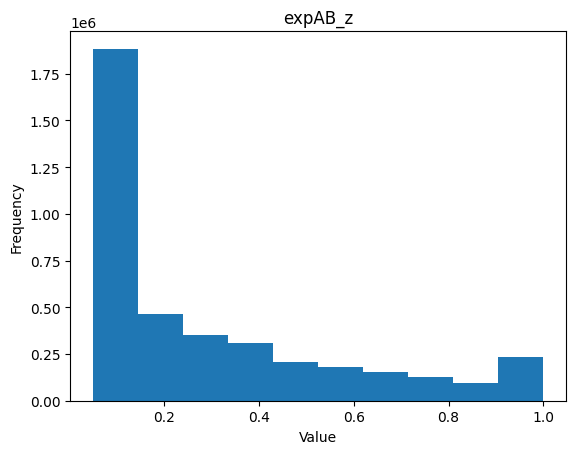

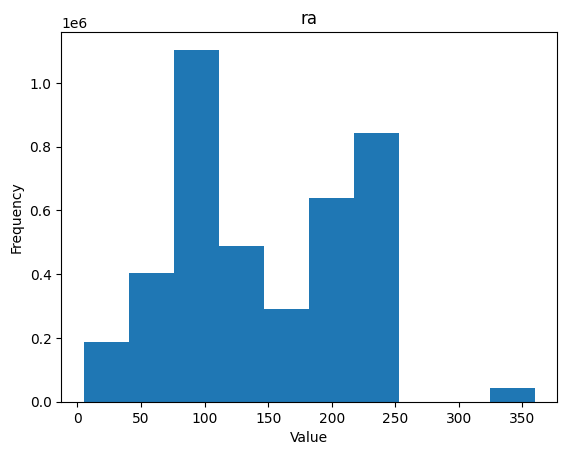

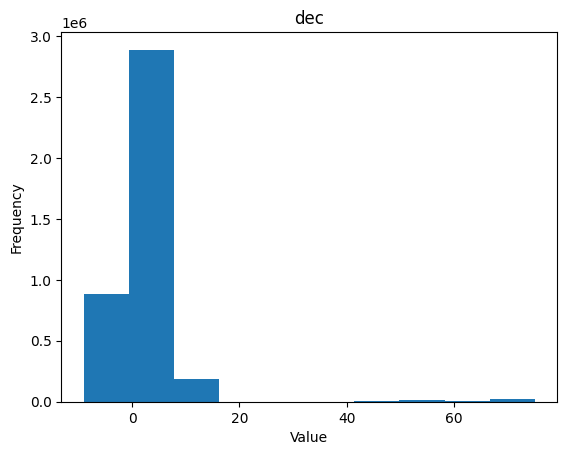

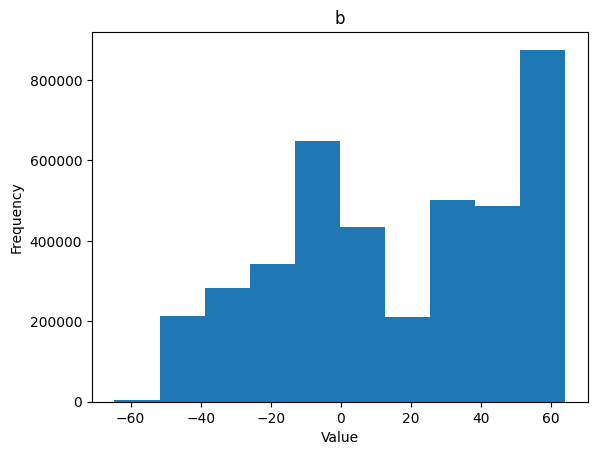

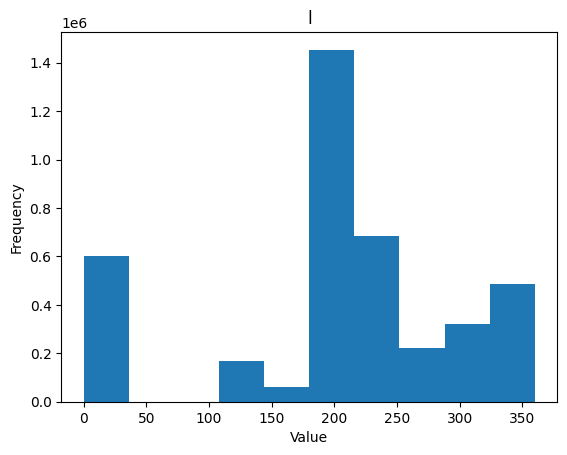

In [37]:
for column in train.columns:
    if (column!='objID' and column!='run' and column!='camcol' and column!='type' ):
       plt.hist(train[column])
       plt.title(column)
       plt.xlabel('Value')
       plt.ylabel('Frequency')
       plt.show()
       print()
       print()

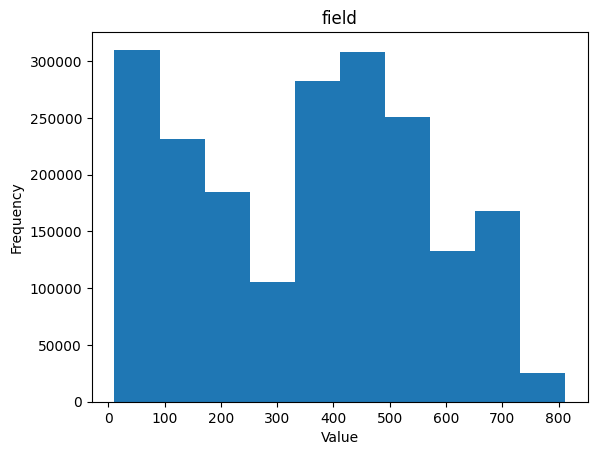

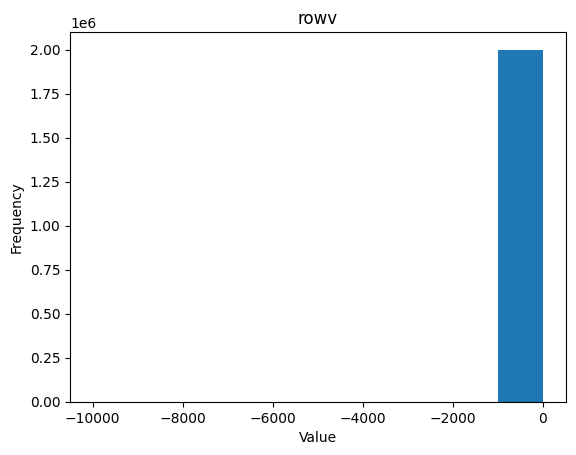

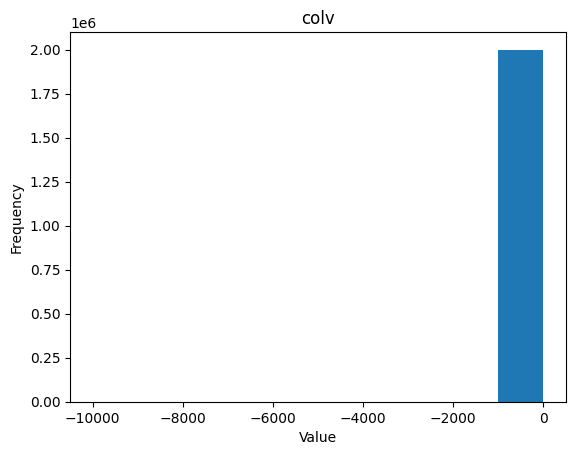

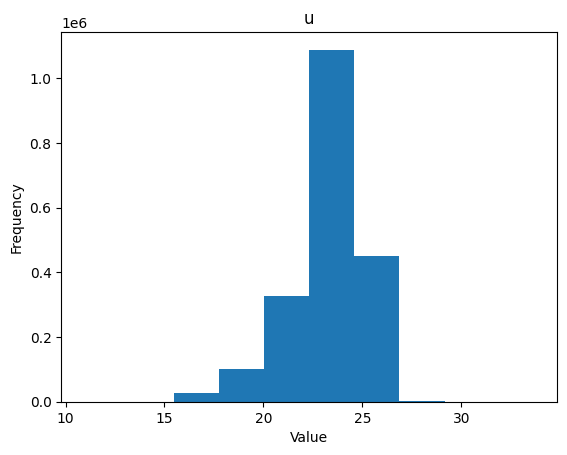

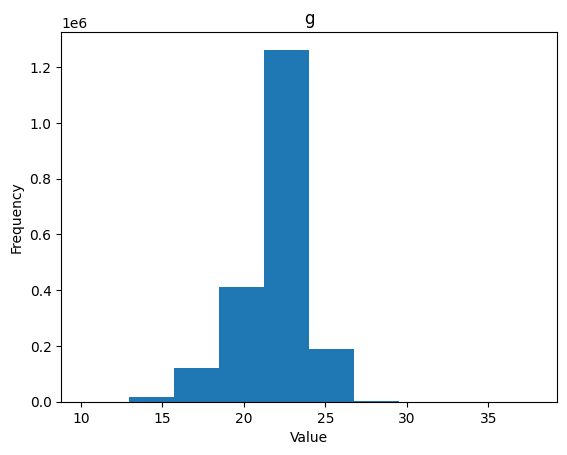

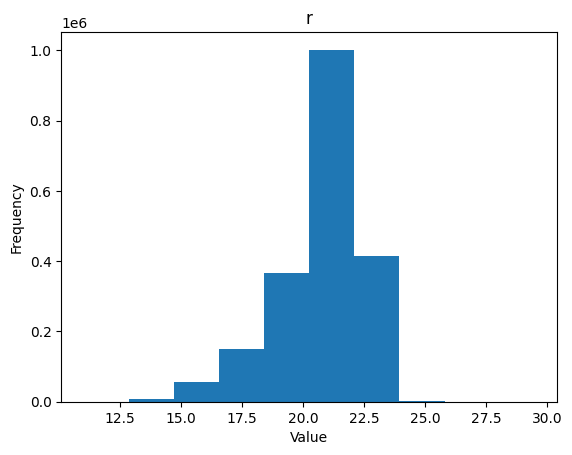

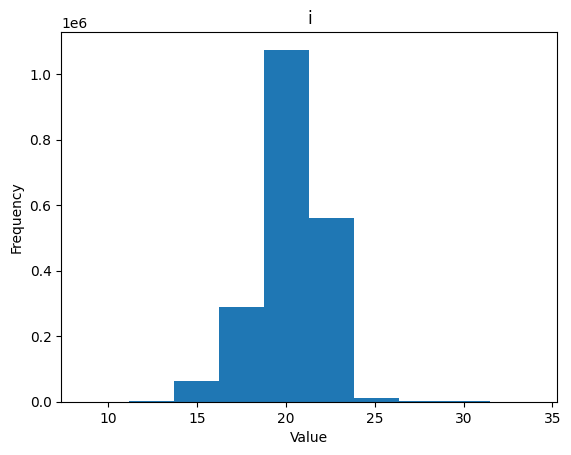

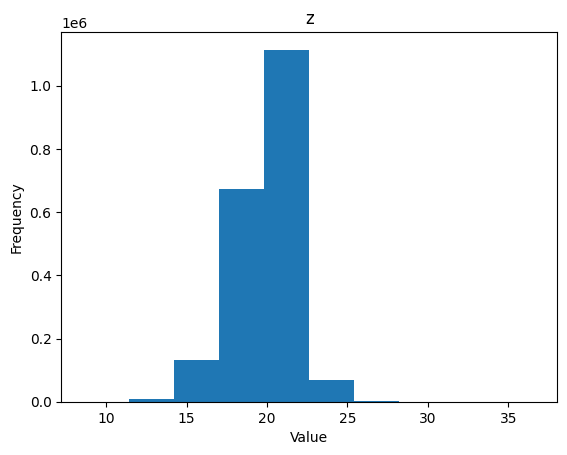

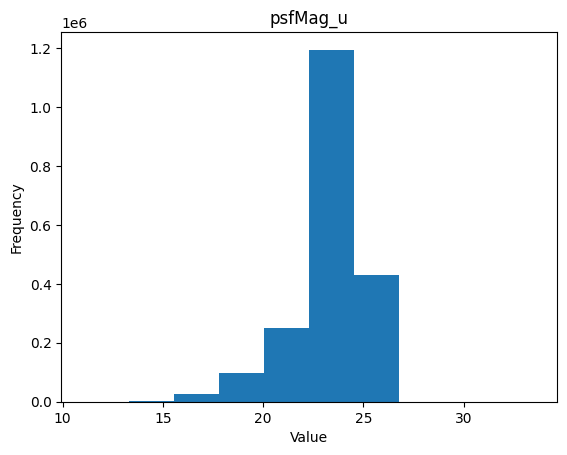

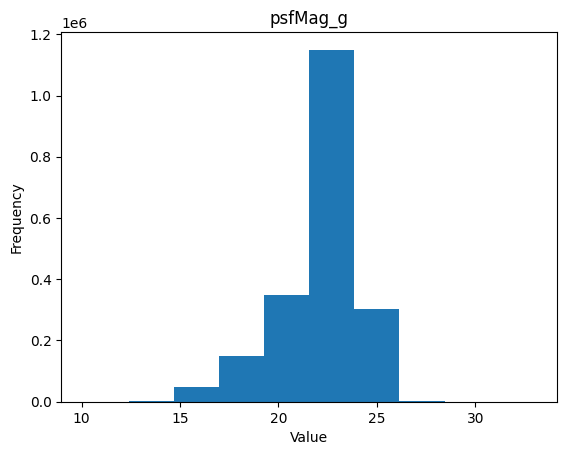

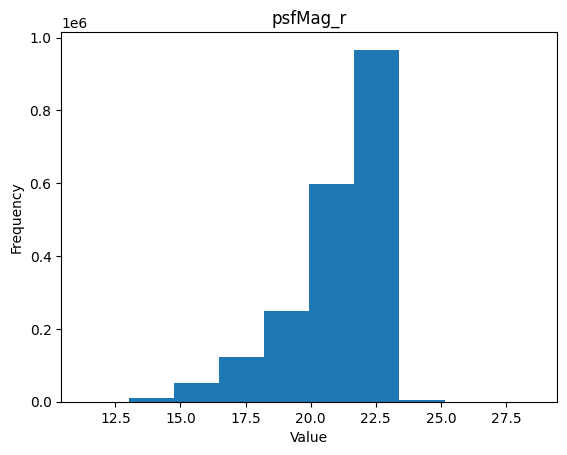

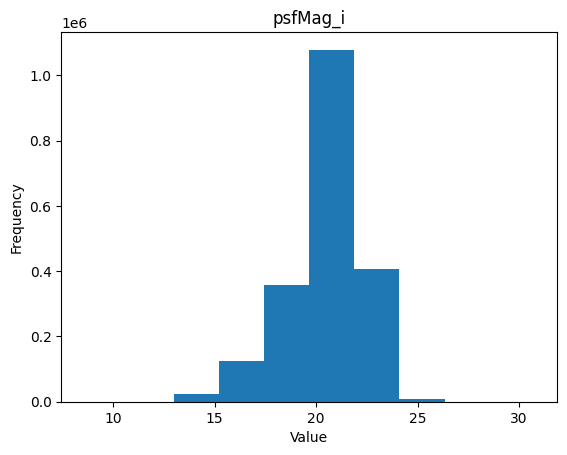

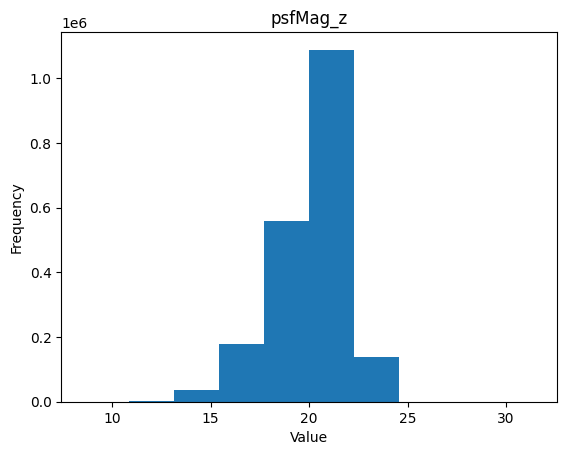

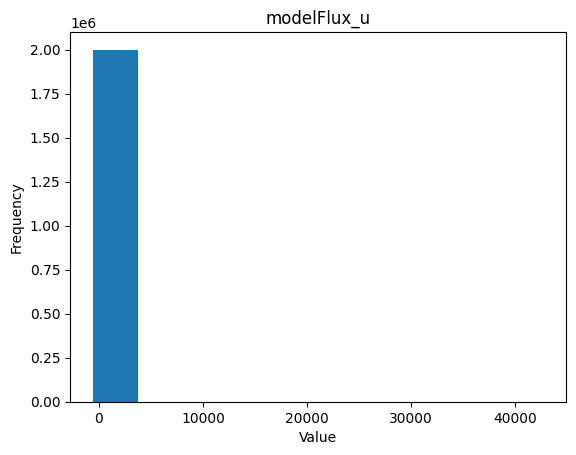

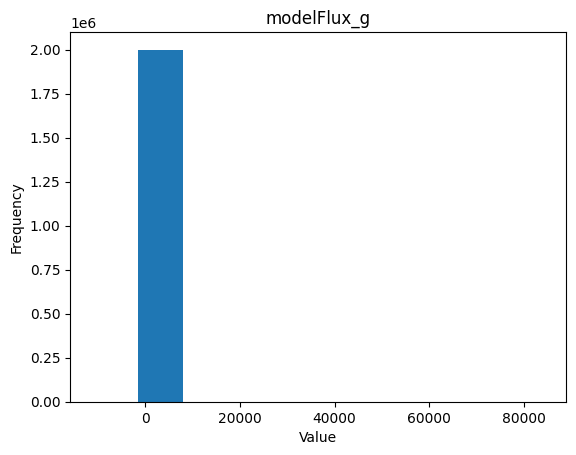

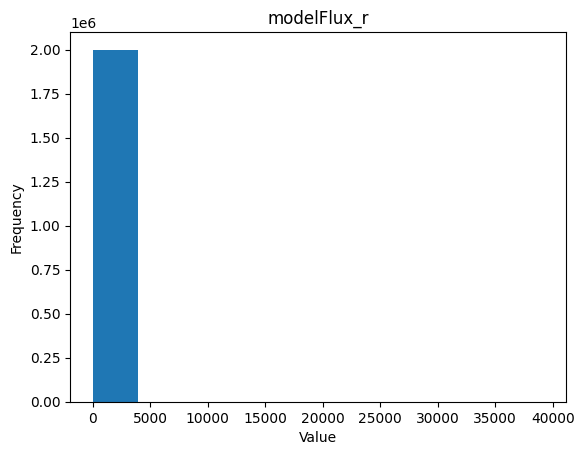

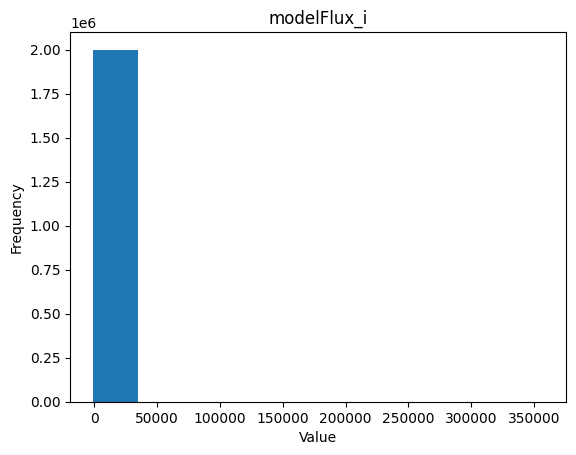

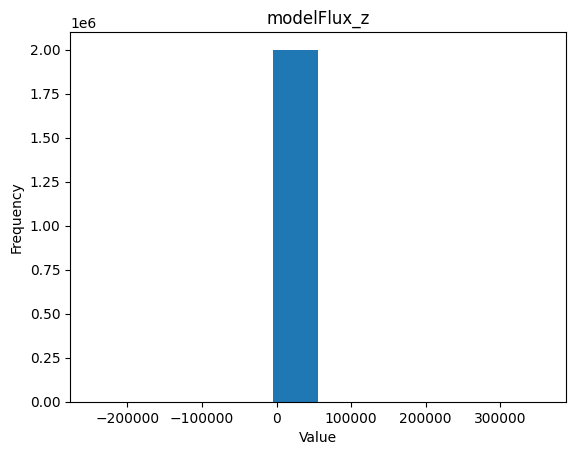

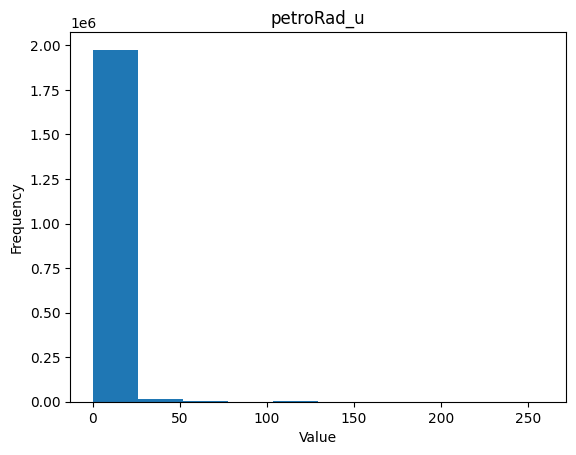

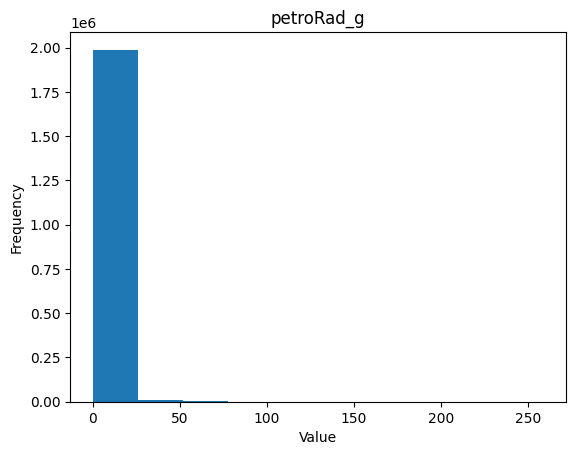

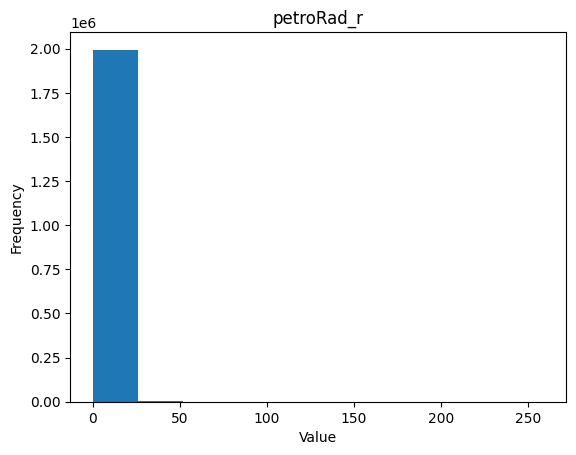

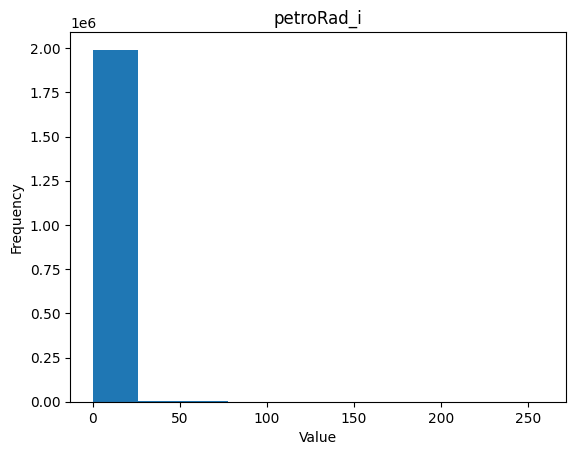

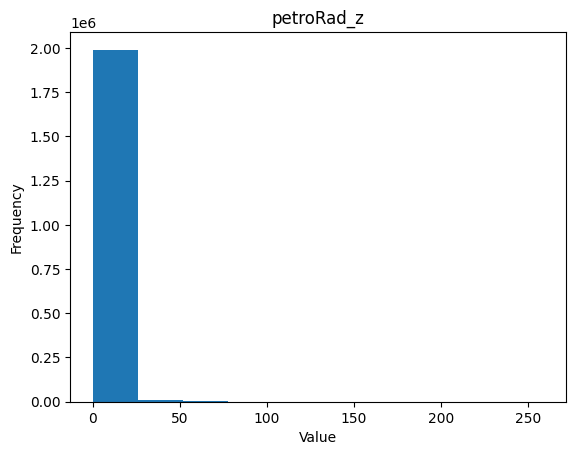

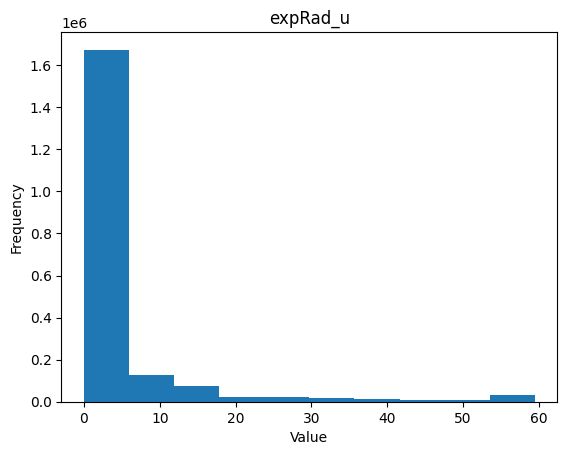

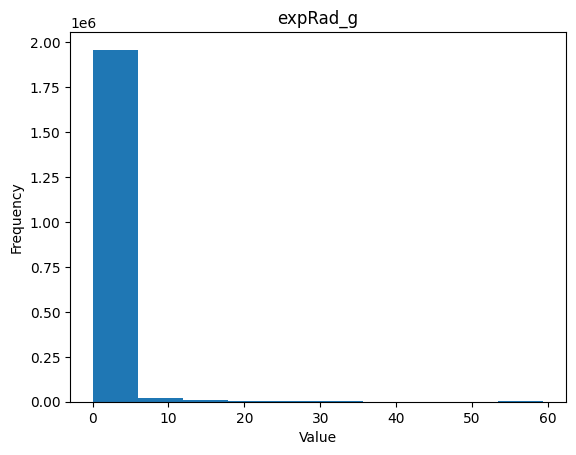

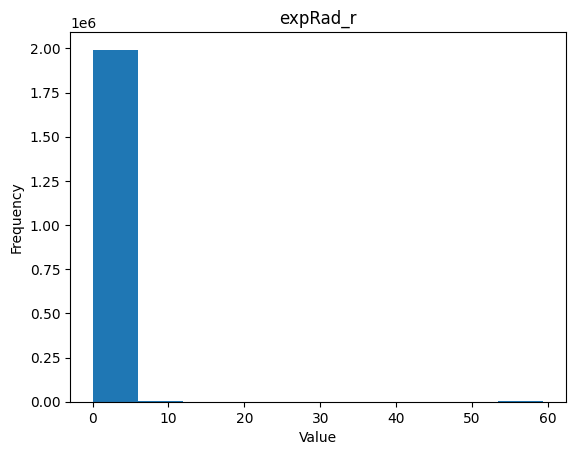

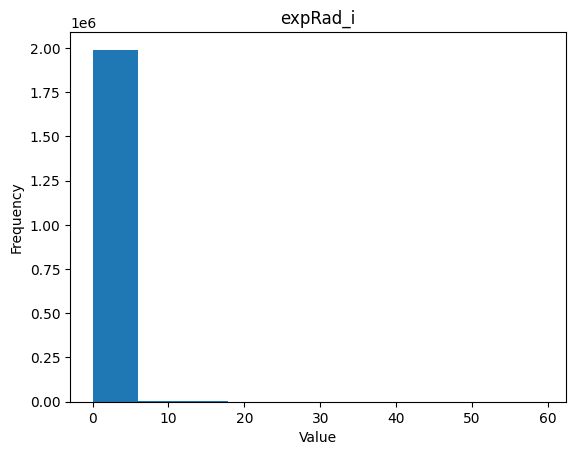

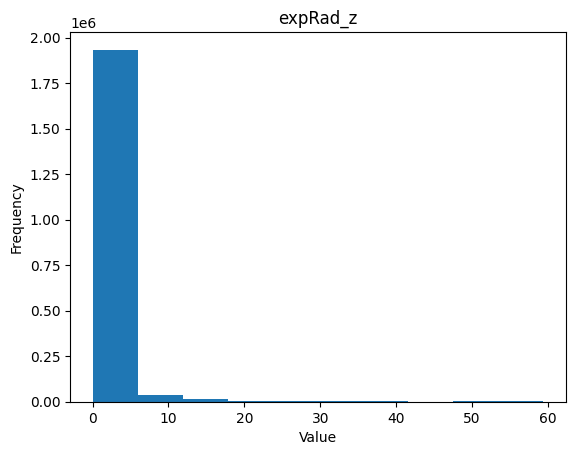

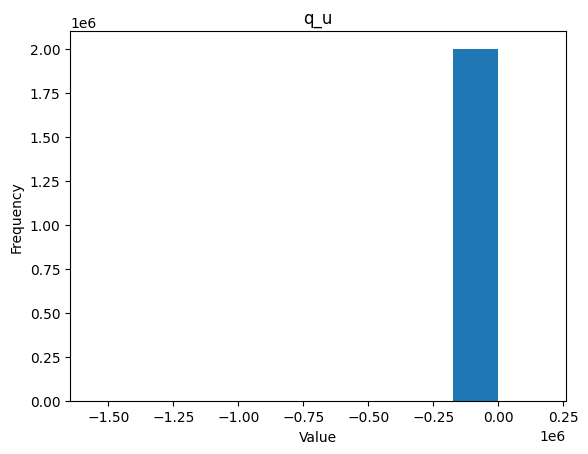

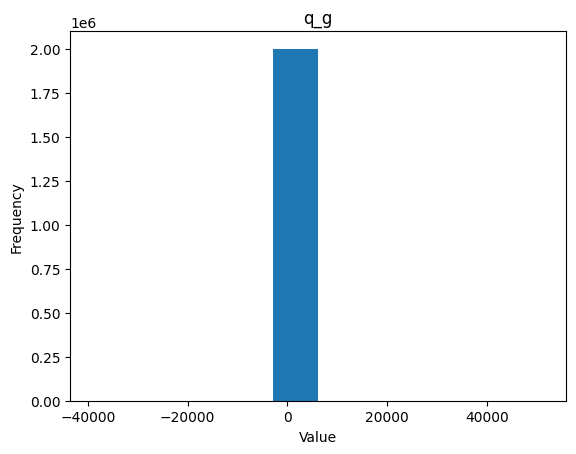

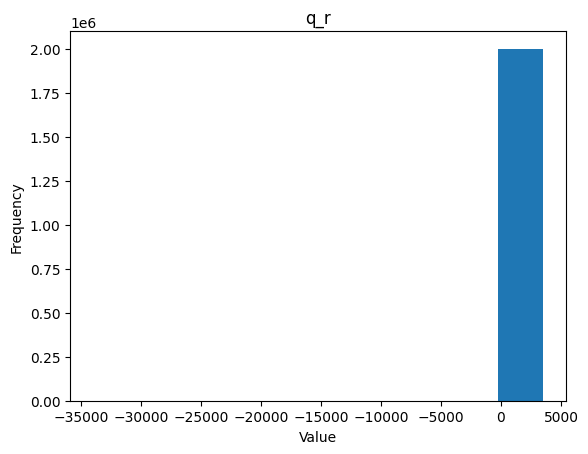

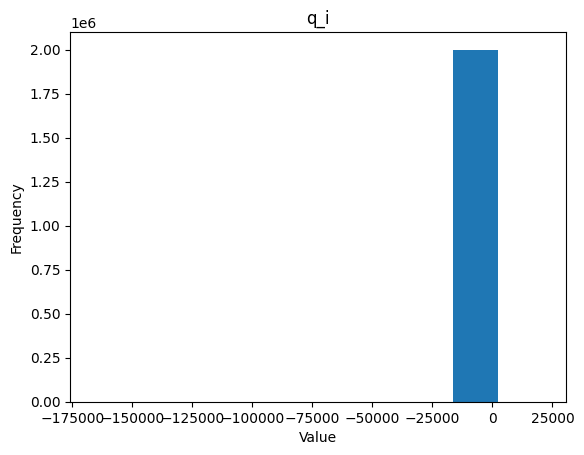

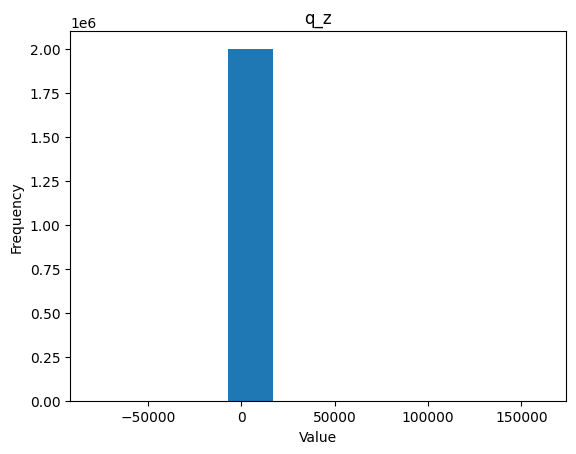

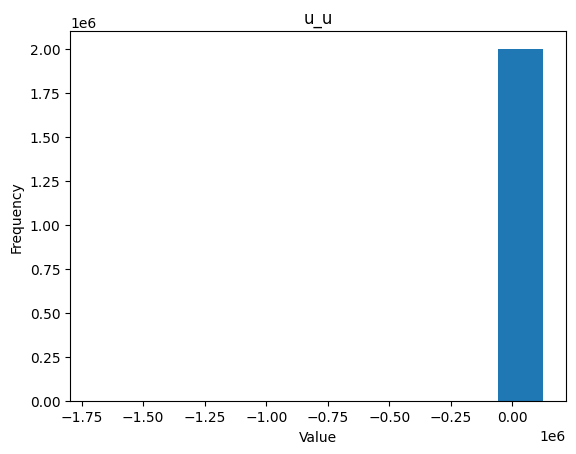

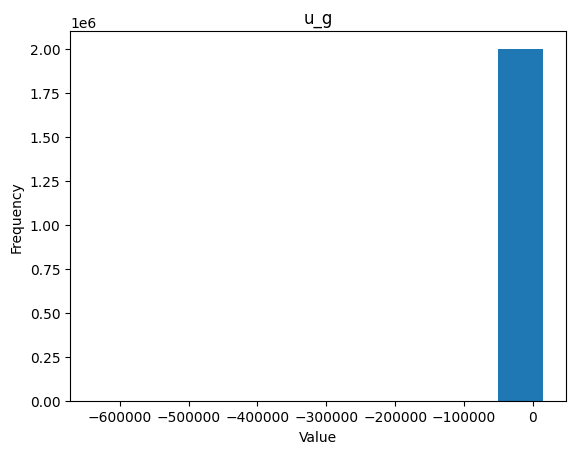

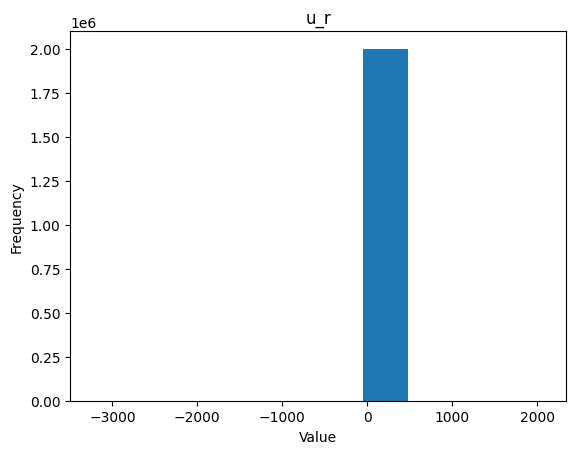

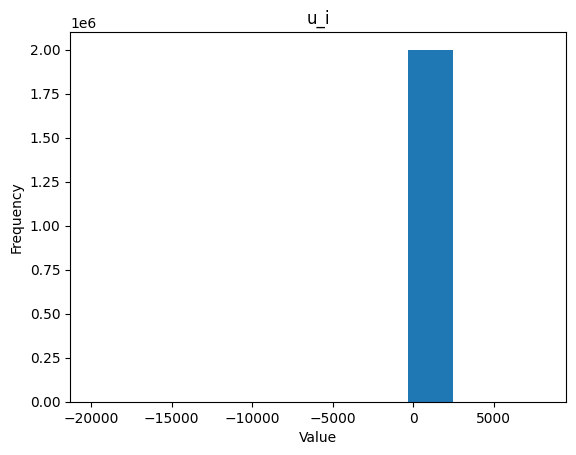

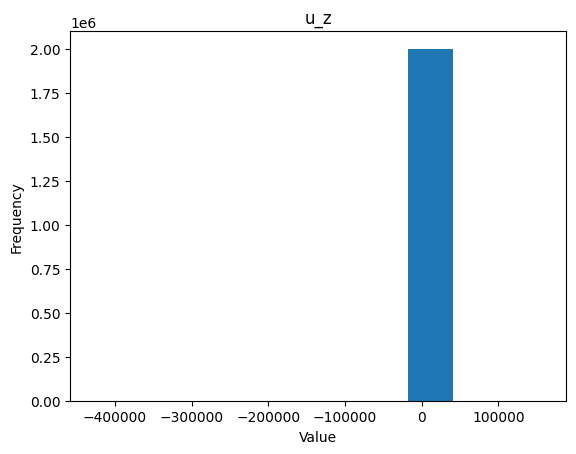

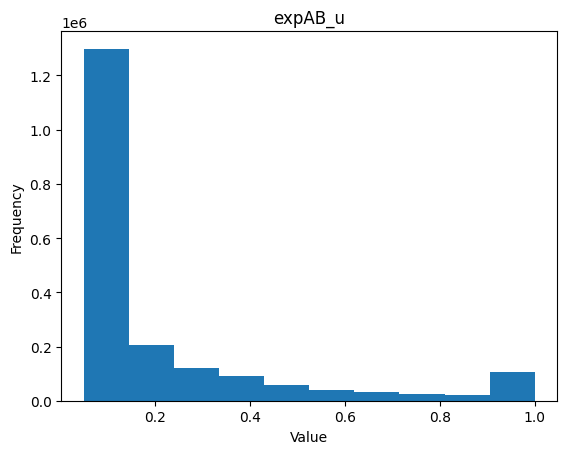

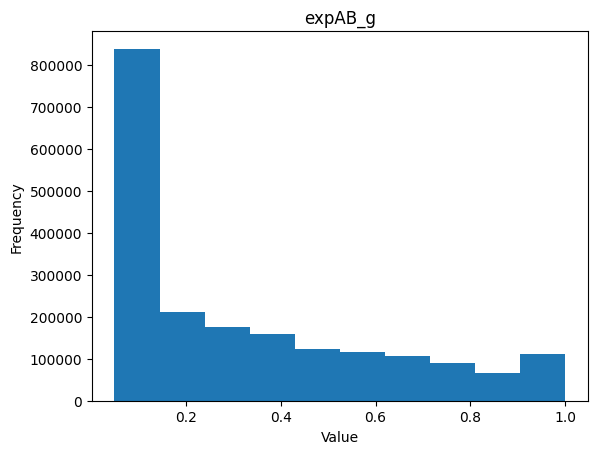

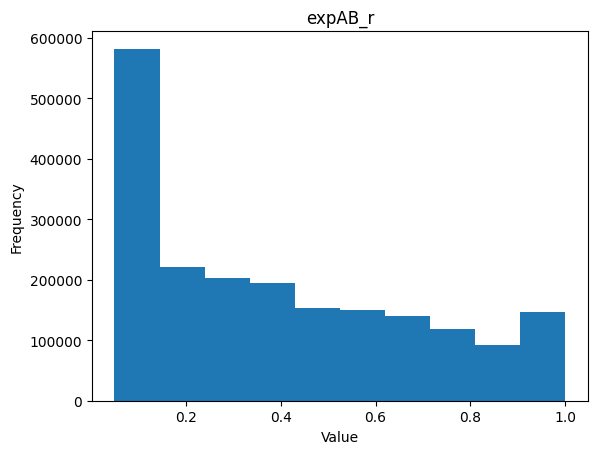

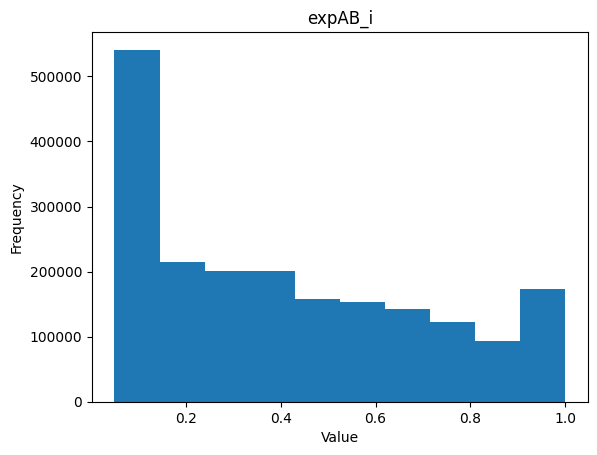

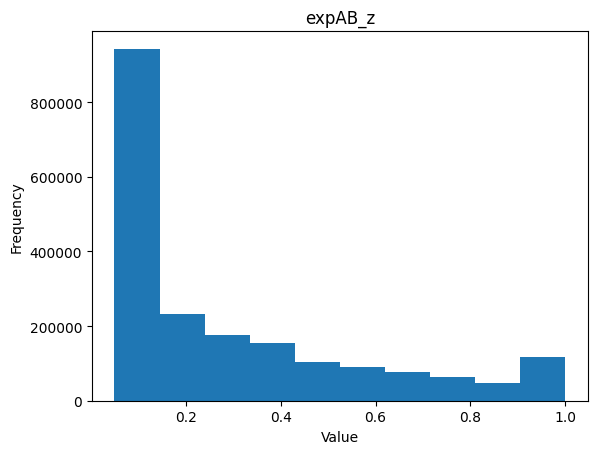

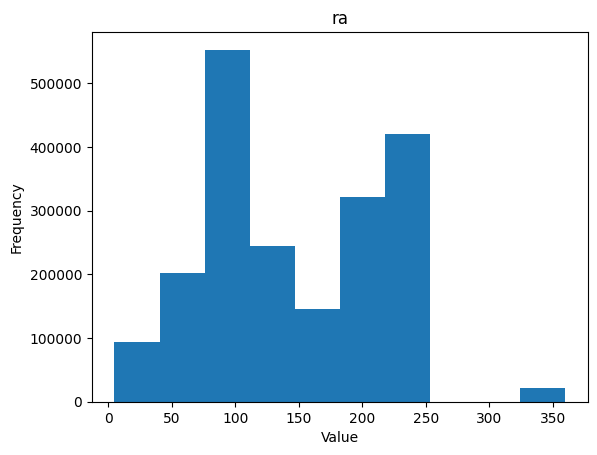

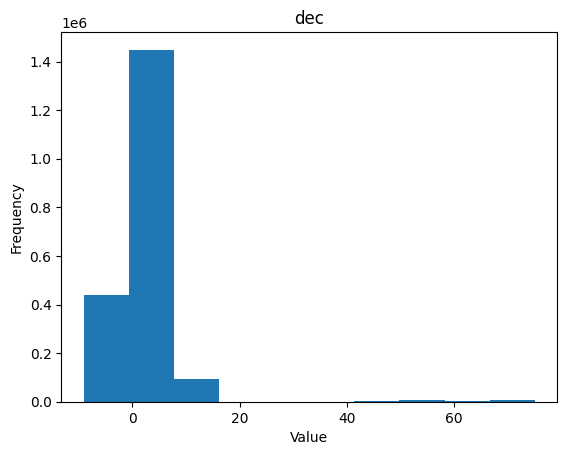

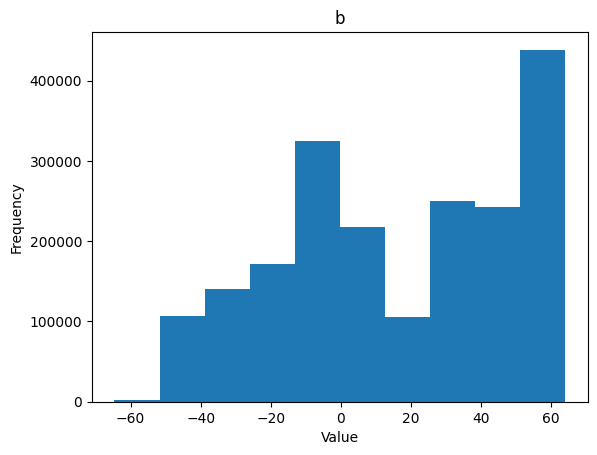

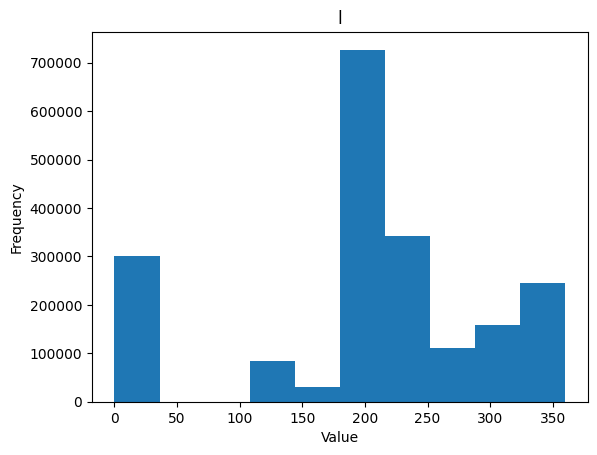

In [38]:
for column in test.columns:
    if (column!='objID' and column!='run' and column!='camcol' and column!='type' ):
       plt.hist(test[column])
       plt.title(column)
       plt.xlabel('Value')
       plt.ylabel('Frequency')
       plt.show()
       print()
       print()

#3. Handling outliers.[02]

In [39]:
for column in test.columns:
    if (column!='objID' and column!='run' and column!='camcol' and column!='type'and column!='modelFlux_u' and column!='modelFlux_g' and column!='modelFlux_i' and column!='modelFlux_r' and column!='modelFlux_z' and column!='expRad_u' and column!='expAB_u' and column!='l'):
      #  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
      #  sns.boxplot(x=column, data=test, ax=axes[0])
      #  axes[0].set_title(column)

       test[column] = np.where(test[column] > test[column].quantile(0.90), test[column].quantile(0.90), test[column])
       test[column] = np.where(test[column] < test[column].quantile(0.10), test[column].quantile(0.10), test[column])

      #  sns.boxplot(x=column, data=test)
      #  plt.title(column)
      #  plt.tight_layout()
      #  plt.show()
      #  print()
      #  print()

In [40]:
for column in train.columns:
    if (column!='objID' and column!='run' and column!='camcol' and column!='type'and column!='modelFlux_u' and column!='modelFlux_g' and column!='modelFlux_i' and column!='modelFlux_r' and column!='modelFlux_z' and column!='expRad_u' and column!='expAB_u' and column!='l'):
      #  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
      #  sns.boxplot(x=column, data=train, ax=axes[0])
      #  axes[0].set_title(column)

       train[column] = np.where(train[column] > train[column].quantile(0.90), train[column].quantile(0.90), train[column])
       train[column] = np.where(train[column] < train[column].quantile(0.10), train[column].quantile(0.10), train[column])

      #  sns.boxplot(x=column, data=train)
      #  plt.title(column)
      #  plt.tight_layout()
      #  plt.show()
      #  print()
      #  print()

In [41]:
prop_5_modelFlux = train.iloc[:,[0,17,18,19,20,21]]
prop_5_modelFlux.head()

,objID,modelFlux_u,modelFlux_g,modelFlux_r,modelFlux_i,modelFlux_z
0,1237646791699727334,0.004813,1.219957,3.657886,7.084589,11.718470
1,1237646797595610001,-0.352365,0.138543,1.336832,2.868492,1.282024
2,1237648705132823367,0.428528,0.742262,2.474087,4.330039,4.661327
3,1237646382079477246,7.474265,60.618810,168.332500,268.493300,367.127900
4,1237646588250424751,0.181306,0.284952,1.400560,4.078766,7.586525


In [42]:
for column in prop_5_modelFlux.columns:
    if (column!='objID'):
      #  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
      #  sns.boxplot(x=column, data=test, ax=axes[0])
      #  axes[0].set_title(column)

       test[column] = np.where(test[column] > test[column].quantile(0.90), test[column].quantile(0.90), test[column])
       test[column] = np.where(test[column] < test[column].quantile(0.10), test[column].quantile(0.10), test[column])

      #  sns.boxplot(x=column, data=test, ax=axes[1])
      #  axes[1].set_title(column)
      #  plt.tight_layout()
      #  plt.show()
      #  print()
      #  print()

In [43]:
for column in prop_5_modelFlux.columns:
    if (column!='objID'):
      #  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
      #  sns.boxplot(x=column, data=train, ax=axes[0])
      #  axes[0].set_title(column)

       train[column] = np.where(train[column] > train[column].quantile(0.90), train[column].quantile(0.90), train[column])
       train[column] = np.where(train[column] < train[column].quantile(0.10), train[column].quantile(0.10), train[column])

      #  sns.boxplot(x=column, data=train, ax=axes[1])
      #  axes[1].set_title(column)
      #  plt.tight_layout()
      #  plt.show()
      #  print()
      #  print()

In [44]:
# fig, axes = plt.subplots(1, 2, figsize=(12, 6))
#        sns.boxplot(x=column, data=train, ax=axes[0])
#        axes[0].set_title(column)

#        train[column] = np.where(train[column] > train[column].quantile(0.90), train[column].quantile(0.90), train[column])
#        train[column] = np.where(train[column] < train[column].quantile(0.10), train[column].quantile(0.10), train[column])

#        sns.boxplot(x=column, data=train, ax=axes[1])
#       #  axes[1].set_title(column)
#        plt.tight_layout()
#        plt.show()
test['modelFlux_u'] = np.log1p(test['modelFlux_u'])
train['modelFlux_u'] = np.log1p(train['modelFlux_u'])

In [45]:
# sns.boxplot(x='modelFlux_u', data=train)

In [46]:
test['modelFlux_r'] = np.log1p(test['modelFlux_r'])
train['modelFlux_r'] = np.log1p(train['modelFlux_r'])
# # sns.boxplot(x='modelFlux_r', data=train)

In [47]:
test['modelFlux_g'] = np.log1p(test['modelFlux_g'])
train['modelFlux_g'] = np.log1p(train['modelFlux_g'])
# # sns.boxplot(x='modelFlux_g', data=train)

In [48]:
test['modelFlux_i'] = np.log1p(test['modelFlux_i'])
train['modelFlux_i'] = np.log1p(train['modelFlux_i'])
# # sns.boxplot(x='modelFlux_i', data=train)

In [49]:
test['modelFlux_z'] = np.log1p(test['modelFlux_z'])
train['modelFlux_z'] = np.log1p(train['modelFlux_z'])
# sns.boxplot(x='modelFlux_z', data=train)

In [50]:
test['expRad_u'] = np.where(test['expRad_u'] > test['expRad_u'].quantile(0.90), test['expRad_u'].quantile(0.90), test['expRad_u'])
test['expRad_u'] = np.where(test['expRad_u'] < test['expRad_u'].quantile(0.10), test['expRad_u'].quantile(0.10), test['expRad_u'])

train['expRad_u'] = np.where(train['expRad_u'] > train['expRad_u'].quantile(0.90), train['expRad_u'].quantile(0.90), train['expRad_u'])
train['expRad_u'] = np.where(train['expRad_u'] < train['expRad_u'].quantile(0.10), train['expRad_u'].quantile(0.10), train['expRad_u'])

In [51]:
test['expRad_u'] = np.log1p(test['expRad_u'])
train['expRad_u'] = np.log1p(train['expRad_u'])
# sns.boxplot(x='expRad_u', data=train)

In [52]:
test['expAB_u'] = np.where(test['expAB_u'] > test['expAB_u'].quantile(0.90), test['expAB_u'].quantile(0.90), test['expAB_u'])
test['expAB_u'] = np.where(test['expAB_u'] < test['expAB_u'].quantile(0.10), test['expAB_u'].quantile(0.10), test['expAB_u'])

train['expAB_u'] = np.where(train['expAB_u'] > train['expAB_u'].quantile(0.90), train['expAB_u'].quantile(0.90), train['expAB_u'])
train['expAB_u'] = np.where(train['expAB_u'] < train['expAB_u'].quantile(0.10), train['expAB_u'].quantile(0.10), train['expAB_u'])

In [53]:
test['expAB_u'] = np.log1p(test['expAB_u'])
train['expAB_u'] = np.log1p(train['expAB_u'])
# sns.boxplot(x='expAB_u', data=train)

In [54]:
print(train['expAB_u'].quantile(0.89))

0.43120322989822935


In [55]:
test["expAB_u"]=np.where(test["expAB_u"]>0.43307142295892237,0.43307142295892237,test["expAB_u"])
train["expAB_u"]=np.where(train["expAB_u"]>0.43307142295892237,0.43307142295892237,train["expAB_u"])
# sns.boxplot(x='expAB_u', data=train)

In [56]:
test['l'] = np.where(test['l'] > test['l'].quantile(0.90), test['l'].quantile(0.90), test['l'])
test['l'] = np.where(test['l'] < test['l'].quantile(0.10), test['l'].quantile(0.10), test['l'])

train['l'] = np.where(train['l'] > train['l'].quantile(0.90), train['l'].quantile(0.90), train['l'])
train['l'] = np.where(train['l'] < train['l'].quantile(0.10), train['l'].quantile(0.10), train['l'])

In [57]:
test['l'] = np.log1p(test['l'])
train['l'] = np.log1p(train['l'])
# sns.boxplot(x='l', data=train)

In [58]:
train.shape

(4000000, 51)

In [59]:
train.isna().sum()

objID          0
run            0
camcol         0
field          0
type           0
rowv           0
colv           0
u              0
g              0
r              0
i              0
z              0
psfMag_u       0
psfMag_g       0
psfMag_r       0
psfMag_i       0
psfMag_z       0
modelFlux_u    0
modelFlux_g    0
modelFlux_r    0
modelFlux_i    0
modelFlux_z    0
petroRad_u     0
petroRad_g     0
petroRad_r     0
petroRad_i     0
petroRad_z     0
expRad_u       0
expRad_g       0
expRad_r       0
expRad_i       0
expRad_z       0
q_u            0
q_g            0
q_r            0
q_i            0
q_z            0
u_u            0
u_g            0
u_r            0
u_i            0
u_z            0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
ra             0
dec            0
b              0
l              0
dtype: int64

In [60]:
# for column in train.columns:
#   if(column!='objID' and column!='run' and column!='camcol' and column!='field'  and column!='type'  and column!='rowv'  and column!='colv'  and column!='u' and column!='g'):
#      train[column].fillna(train[column].mean(),inplace=True)

In [61]:
test['type'] = test['type'].map({'galaxy':0, 'star':1})
train['type'] = train['type'].map({'galaxy':0, 'star':1})

In [62]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(contamination=0.1)
outliers = clf.fit_predict(test[['l']])

test = test[outliers != -1]
# test['l'] = np.log1p(test['l'])
# sns.boxplot(x='l', data=test)


clf = IsolationForest(contamination=0.1)
outliers = clf.fit_predict(train[['l']])

train = train[outliers != -1]
# train['l'] = np.log1p(train['l'])
# sns.boxplot(x='l', data=train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [63]:
print(train['l'].quantile(0.12))

4.995125922372117


In [64]:
test["l"]=np.where(test["l"]<=2.697950547791778,2.697950547791778,test["l"])
train["l"]=np.where(train["l"]<=2.697950547791778,2.697950547791778,train["l"])
# sns.boxplot(x='l', data=train)

In [65]:
test["l"]=np.where(test["l"]<=4.9706466886150675,4.9706466886150675,test["l"])
train["l"]=np.where(train["l"]<=4.9706466886150675,4.9706466886150675,train["l"])
# sns.boxplot(x='l', data=train)

In [66]:
print(train['expAB_u'].quantile(0.98))

0.43307142295892237


# 4. Handling missing values.[02]

In [67]:
train.isna().sum()

objID          0
run            0
camcol         0
field          0
type           0
rowv           0
colv           0
u              0
g              0
r              0
i              0
z              0
psfMag_u       0
psfMag_g       0
psfMag_r       0
psfMag_i       0
psfMag_z       0
modelFlux_u    0
modelFlux_g    0
modelFlux_r    0
modelFlux_i    0
modelFlux_z    0
petroRad_u     0
petroRad_g     0
petroRad_r     0
petroRad_i     0
petroRad_z     0
expRad_u       0
expRad_g       0
expRad_r       0
expRad_i       0
expRad_z       0
q_u            0
q_g            0
q_r            0
q_i            0
q_z            0
u_u            0
u_g            0
u_r            0
u_i            0
u_z            0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
ra             0
dec            0
b              0
l              0
dtype: int64

#5. Handling categorical features.[02]

In [68]:
train["type"].value_counts()

1    1857530
0    1743263
Name: type, dtype: int64

In [69]:
# test['type'] = test['type'].map({'galaxy':0, 'star':1})
# train['type'] = train['type'].map({'galaxy':0, 'star':1})

#6. Feature scaling.[01]

In [70]:
# There is no need to do feature scaling because there are no large values in between lower and upper boundary of the domains.

# 7. Correlation matrix[01]

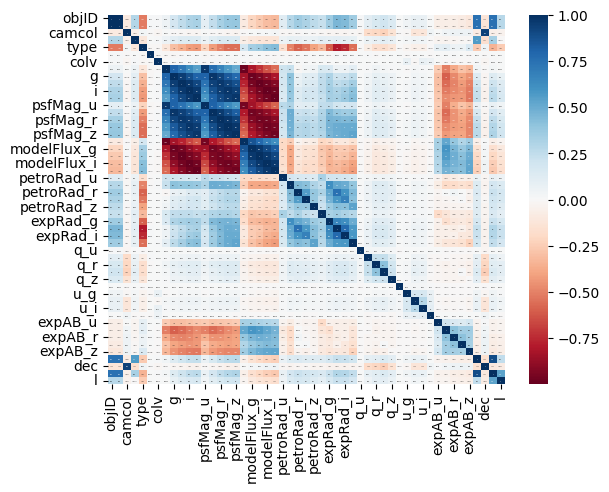

In [71]:
sns.heatmap(train.corr(), annot=True, annot_kws={'size':0.0001},cmap="RdBu")
plt.show()

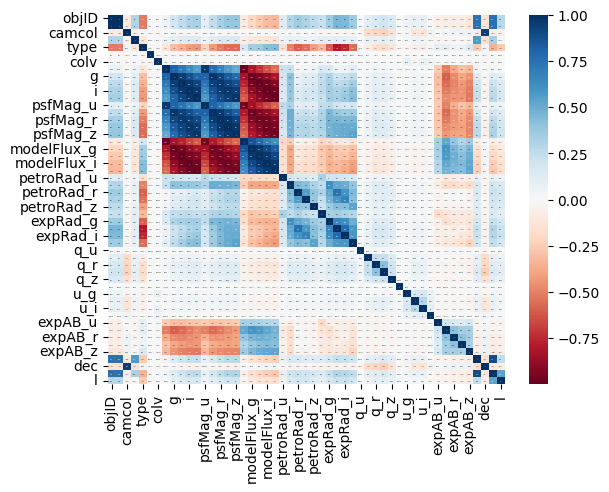

In [72]:
sns.heatmap(test.corr(), annot=True, annot_kws={'size':0.0001},cmap="RdBu")
plt.show()

#8. Model selection, training, prediction.[02]

In [73]:
from xgboost import XGBClassifier

In [74]:
import gc

In [75]:
X_train = train.drop("type", axis=1)
y_train = train["type"]
del train
gc.collect()
X_test = test.drop("type", axis = 1)
y_test = test["type"]
del test
gc.collect()

0

In [76]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

10. Hyper Parameter Tuning [01]

n_estimators: This parameter specifies the number of boosting rounds or trees to build. More trees can lead to better performance but also increase the risk of overfitting.

max_depth: It determines the maximum depth of each tree. Deeper trees can capture more complex patterns in the data but also increase the risk of overfitting.

learning_rate: This parameter controls the step size at each iteration while moving toward a minimum of the loss function. It's used to prevent overfitting by scaling the contribution of each tree.

subsample: It specifies the fraction of samples to be used for training each tree. Setting it to less than 1.0 can introduce stochasticity and help prevent overfitting.

reg_alpha: Regularization term for L1 regularization. It penalizes large coefficients and helps prevent overfitting by encouraging simpler models.

reg_lambda: Regularization term for L2 regularization. Similar to reg_alpha, it penalizes large coefficients but uses a different regularization approach.

gamma: Minimum loss reduction required to make a further partition on a leaf node of the tree. It acts as a regularization parameter by controlling the complexity of the tree.

min_child_weight: It specifies the minimum sum of instance weight (hessian) needed in a child. It helps prevent overfitting by controlling the minimum number of instances required to create any child node.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the hyperparameter grid
param_grid = {
    "n_estimators": [100, 150, 180],
    "max_depth": [13, 15, 17],
    "learning_rate": [0.1, 0.08, 0.05],
    "subsample": [0.8, 0.9, 1.0],
    "reg_alpha": [0, 0.1, 0.5],
    "reg_lambda": [0, 0.1, 0.5],
    "gamma": [0, 3.5e-05, 2.5e-05],
    "min_child_weight": [1, 15, 20]
}

# Create an XGBoost regressor
xgb = XGBRegressor()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(best_params)

In [77]:
xgb_best_params = {
    "n_estimators": 180,
    "max_depth": 17,
    # "learning_rate": 0.08245844777734937,
    "learning_rate": 0.08,
    "subsample": 0.9,
    # "reg_alpha": 0.16634334643800422,
    "reg_alpha": 0.1,
    # "reg_lambda": 0.010449329514317554,
    "reg_lambda": 0.15,
    "gamma": 3.5e-05,
    "min_child_weight": 15,
}

In [78]:
xgbc = XGBClassifier(tree_method='gpu_hist', **xgb_best_params)
xgbc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:57:31] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3.5712964675328855e-05, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08245844777734937, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=17, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=188, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# XGBClassifier Initialization:

XGBClassifier: This is a class from the XGBoost library specifically designed for classification tasks. It implements the scikit-learn estimator interface, making it compatible with scikit-learn's functionality.
tree_method='gpu_hist': This parameter specifies the method used to build trees. Setting it to 'gpu_hist' indicates that the algorithm will utilize GPU resources for tree building, specifically using the histogram-based method optimized for GPU computation.
**xgb_best_params: This part of the code unpacks the dictionary xgb_best_params containing the best hyperparameters obtained from the grid search (e.g., n_estimators, max_depth, learning_rate, etc.). It passes these hyperparameters as keyword arguments to the XGBClassifier constructor, configuring the classifier with the best settings found during hyperparameter tuning.

auto: This is the default setting. XGBoost automatically chooses the most efficient method based on the training data and the hardware available. It typically selects between 'exact' and 'approx' methods depending on the dataset size.

exact: This method constructs trees using exact greedy algorithm. It's the most precise but can be slower for larger datasets.

approx: This method constructs trees using approximate algorithm. It's faster than the exact method, making it suitable for large datasets, but may sacrifice a bit of accuracy.

hist: This method constructs trees using a histogram-based algorithm. It's an approximate algorithm that buckets feature values into discrete bins to speed up computation. It's efficient for both CPU and GPU, but GPU-accelerated histogram construction is particularly fast.

In [79]:
# from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay,roc_auc_score,)

# 9. Performance measures.[02]

In [80]:
def cm_to_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2 * (precision * recall) / (precision + recall)
    return accuracy, precision, recall, f1


In [81]:
def evaluate_model(
    model,
    on="train",
    plot_cmat=False,
    verbose=True,
):

    if on == "train":
        X = X_train
        y = y_train
    else:
        X = X_test
        y = y_test
    y_pred = model.predict(X)
    cm = confusion_matrix(y, y_pred)
    accuracy, precision, recall, f1 = cm_to_metrics(cm)
    auc_score = roc_auc_score(y, y_pred)

    if plot_cmat:
        disp = ConfusionMatrixDisplay(
            confusion_matrix=cm, display_labels=["star", "galaxy"]
        )
        disp.plot()
        plt.show()
    if verbose:
        try:
            model_name = model.__class__.__name__
        except:
            model_name = ""
        print(f"Accuracy on {on} set of the model {model_name}: {accuracy:.4f}")
        print(f"Precision on {on} set of the model {model_name}: {precision:.4f}")
        print(f"Recall on {on} set of the model {model_name}: {recall:.4f}")
        print(f"F1 on {on} set of the model {model_name}: {f1:.4f}")
        print(f"AUC on {on} set of the model {model_name}: {auc_score:.4f}\n")
        cr = classification_report(y, y_pred)
        print(cr)
    result = {"accuracy": accuracy, "precision": precision,"recall": recall, "f1": f1, "auc": auc_score,
    }
    return result

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [11:58:13] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


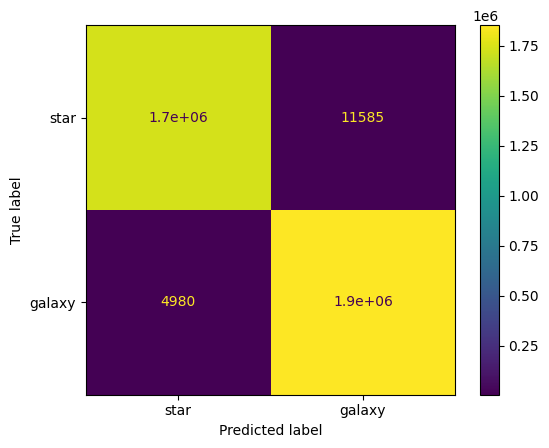

Accuracy on train set of the model XGBClassifier: 0.9954
Precision on train set of the model XGBClassifier: 0.9938
Recall on train set of the model XGBClassifier: 0.9973
F1 on train set of the model XGBClassifier: 0.9955
AUC on train set of the model XGBClassifier: 0.9953

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1743263
           1       0.99      1.00      1.00   1857530

    accuracy                           1.00   3600793
   macro avg       1.00      1.00      1.00   3600793
weighted avg       1.00      1.00      1.00   3600793



{'accuracy': 0.9953996244716095,
 'precision': 0.9937853213420702,
 'recall': 0.9973190204195894,
 'f1': 0.99554903517646,
 'auc': 0.9953367184107373}

In [82]:
evaluate_model(
    xgbc,
    on="train",
    plot_cmat=True,
    verbose=True,)

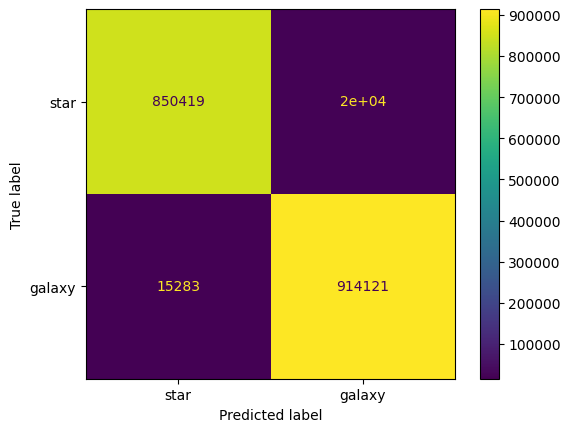

Accuracy on test set of the model XGBClassifier: 0.9803
Precision on test set of the model XGBClassifier: 0.9783
Recall on test set of the model XGBClassifier: 0.9836
F1 on test set of the model XGBClassifier: 0.9809
AUC on test set of the model XGBClassifier: 0.9801

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    870683
           1       0.98      0.98      0.98    929404

    accuracy                           0.98   1800087
   macro avg       0.98      0.98      0.98   1800087
weighted avg       0.98      0.98      0.98   1800087



{'accuracy': 0.9802526211233124,
 'precision': 0.9783130080213188,
 'recall': 0.9835561284436047,
 'f1': 0.9809275620791839,
 'auc': 0.9801412227996085}

In [83]:
evaluate_model(
    xgbc,
    on="test",
    plot_cmat=True,
    verbose=True,)

In [84]:
xgbc_score = xgbc.score(X_test, y_test)
print(xgbc_score)

0.9802526211233124


# 11. Saving the model.[01]

In [85]:
import pickle

In [87]:
model_pkl_file = "Official_ML_mini_project.pkl"
with open(model_pkl_file, 'wb') as file:
  pickle.dump(xgbc,file)

In [88]:
with open(model_pkl_file, 'rb') as file:
  model = pickle.load(file)